# Модуль 1, Спринт 2, Проект 2

Выполнил: Данила Козлов, студент 20 когорты DA.


### План Работы:
0. [Описание цели исследования](#cell0)


1. [Шаг 1. Первичный осмотр данных](#cell1)  
    - [Откройте файл с данными и изучите общую информацию.](#cell1.1)
    - [Интересные факты в данных](#cell1.2)
    - [Вывод](#cell1.3)  


2. [Шаг 2. Предобработка данных](#cell2)  
    - [Стобец ceiling_height](#cell2.1)
    - [Столбец floors_total](#cell2.2)
    - [Столбец living_area](#cell2.3)
    - [Столбец is_apartment](#cell2.4)
    - [Столбец  kitchen_area](#cell2.5)
    - [Столбец balcony](#cell2.6)
    - [Столбец airports_nearest](#cell2.7)
    - [Столбец locality_name](#cell2.8)
    - [Столбец days_exposition](#cell2.9)
    	- [Вывод](#cell2.9.1)
        - [Замена типа данных](#cell2.10)
    - [Выделение хороших  и не очень данных](#cell2.11)
        - [Вывод](#cell2.11.1)
    - [Поиск дубликатов](#cell2.12)
3. [Шаг 3. Посчитайте и добавьте в таблицу](#cell3)
    - [Расчет цены квадратного метра](#cell3.1)
        - [Вывод](#cell3.1.1)
    - [Добавление дня недели, месяц и год публикации объявления](#cell3.2)
        - [Вывод](#cell3.2.1)
    - [Категоризация этажа квартиры](#cell3.3)
    - [Вычисление долей жилой и кухонной площадей по отношению к общей площади](#cell3.4)  
        - [Вывод](#cell3.4.1)
4. [Исследовательский анализ](#cell4)  

5. [Шаг 5. Общий вывод](#cell5)  

6. [Комментарии и вопросы](#cell6)
    


Появился виджет для составления оглавления, поэтому надобность в моем оглавлении отпала...

<a id="cell0"></a>
# Описание цели исследования

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

<a id="cell1"></a>
# Первичный осмотр данных

## Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="cell1.1"></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
#import matplotlib.ticker as mtick
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.sample(10, random_state = 42))
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7944,14,2990000.0,35.0,2019-03-29T00:00:00,1,NaN,17.0,16.0,10,NaN,...,9.0,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7539,8,3790000.0,33.0,2018-12-18T00:00:00,1,2.50,7.0,18.0,2,NaN,...,5.6,NaN,Санкт-Петербург,27455.0,8621.0,1.0,217.0,0.0,NaN,90.0
9889,1,12990000.0,191.0,2017-08-31T00:00:00,7,3.30,5.0,136.1,2,NaN,...,16.0,0.0,Санкт-Петербург,26856.0,5704.0,0.0,NaN,1.0,1017.0,77.0
649,1,7210000.0,61.5,2018-10-02T00:00:00,3,2.92,5.0,43.2,4,NaN,...,5.7,1.0,Санкт-Петербург,25407.0,3982.0,1.0,483.0,0.0,NaN,89.0
13768,10,550000.0,36.0,2017-08-22T00:00:00,1,NaN,2.0,20.0,1,NaN,...,8.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,92.0
12927,6,5800000.0,52.3,2017-06-12T00:00:00,2,NaN,12.0,30.5,8,NaN,...,10.3,0.0,Санкт-Петербург,36811.0,9487.0,1.0,307.0,0.0,NaN,17.0
4449,13,4400000.0,62.0,2017-11-16T00:00:00,2,NaN,12.0,33.0,4,NaN,...,14.0,NaN,Санкт-Петербург,31481.0,12074.0,0.0,NaN,0.0,NaN,68.0
16651,11,5550000.0,64.5,2016-09-21T00:00:00,3,NaN,9.0,39.0,7,NaN,...,8.0,0.0,Санкт-Петербург,18870.0,13679.0,1.0,492.0,0.0,NaN,362.0
4771,12,9990000.0,117.1,2015-07-09T00:00:00,5,NaN,4.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,21465.0,1404.0,1.0,378.0,2.0,103.0,946.0
12731,20,5350000.0,65.2,2018-10-11T00:00:00,3,NaN,9.0,40.0,4,NaN,...,8.5,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,186.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
data.select_dtypes(['object']).columns

Index(['first_day_exposition', 'is_apartment', 'locality_name'], dtype='object')

In [5]:
for column in data.select_dtypes(['object']).columns:
    print(f'Столбец: {column}')
    display(data[column].describe())



Столбец: first_day_exposition


count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Столбец: is_apartment


count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

Столбец: locality_name


count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

### *Интересные факты в данных:* <a id="cell1.2"></a>
- ceiling_height: есть потолки размером в 100 метров, скорее всего это выброс.

- first_day_exposition: Необходимо поменять тип данных на DateTime

- rooms: Есть объявления с количеством комнат больше 5, но в данных нет объявлений с 13 комнатами 😂

- ceiling_height: максимальная высота потолков 100м, это прям башня какая-то. А минимальная высота потолка всего 1м... Скорее всего это выбросы, но нужно проверить. Также необходимо заполнить пропуски медианным значением, так как в среднем высота потолков в жилищах особо не отличаются и большая часть находится в интервале 2.5 - 2.8 метра.

- floors_total: Есть несколько пропусков (86), пока неизвестно с чем это связано, возможно просто одноэтажные здания или постройки.

- living_area: Есть много пропусков > 2000, также очень большой разброс по площади от 2 до 409 кв. метров.

- floor: Есть объявления с квартирами на высоких этажах, но в основном объявления с квартироми на этажах от 2 до 8

- is_apartment: Вообще странно, всего 2775 записей всего и все false, скорее всего остальные записи должны являться True, но так ли это???  Скорее наоборот, все False должны быть True, а все NA быть False. Так логичнее, скорее всего возникла ошибка при сборе данных  
`Согласно приказу Министерства культуры России, апартамент — это две и более жилые комнаты (гостиная/столовая и спальня (кабинет)), в средстве размещения (гостиница, мотель, дом отдыха, санаторий и т.п.), общей площадью не менее 40 кв. м, оборудованные всем необходимым (соответствующей мебелью и инвентарем) для временного проживания. Следует обратить внимание на то, что Министерство культуры РФ не занимается регулированием жилищных отношений в России. При этом именно его подзаконный акт (даже не закон) является документом, в котором об апартаментах сказано хоть что-то официальное.`  


- studio: Здесь вроде всё в порядке, студий всего около 150 объявлений. Но тип данных object а не bool

- kitchen_area: Не хватает около 2300 записей, либо в данных объявлениях кухня не предусмотрена, но студий у нас всего 150... Возможно связано это с аппартаментами, нужно проверить. Либо кухни просто не предусматриваются в этих объявлениях и тогда можно площадь заменить на 0.

- balcony: Здесь вроде все в порядке, пропущенные значения скорее всего значат, что балконов просто нет и их можно заменить нулями. Единственное, необходимо поменять тип данных на целочисленный

- locality_name: Не хватает 49 местоположений объявлений. Думаю можно данные записи просто удалить, если с ними не связаны критичные данные, либо заменить на "Санкт-Петербург" как самое популярное место

- airports_nearest: Не хватает около 5500 записей, не могу сказать сразу с чем это связано. Подозреваю, что это все объявления либо с местонахождением в СПБ, либо рядом с ним (с СПБ 15721 объявление, в целом довольно близко по цифрам). Но в среднем аэропорт находится в 28 километрах

- cityCenters_nearest: 18180 объявлений, также не хватает около 5500 записей, может это как-то связано? В среднем 13 километров расстояние между центром и квартирой. 

- parks_around3000: 18181 объявление, ну это уже странно, что с остальными 5500 записями где эта информация не указана? Максимальное число парков рядом - 3

- parks_nearest: Ну тут уже видимо указаны парки, где рядом есть хотябы 1 парк в 3000 метрах

- ponds_around3000: снова 18181 объявление, случайность? Не думаю.

- ponds_nearest: Такая же ситуация как и с парками, но прудов поблизасти больше: 9110 записей есть

- days_exposition: Не на все объявления есть информация сколько дней они выставлялись, не хватает 3200 записей. Возможно стоит сразу избавиться от этих записей?

### Вывод <a id="cell1.3"></a>

Исходя из приведённой выше информации, имеем, что в таблице всего 23699 записей.
В 13 столбцах: 
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition
- locality_name

есть отсутствующие значения. Дальше попытаемся выяснить с чем это связано.

# Шаг 2. Предобработка данных <a id="cell2"></a>

## Стобец ceiling_height <a id="cell2.1"></a>

Что интересного можно сказать про высоту потолков, для нормального жилья высота потолков не должна быть ниже 2ух метров ну и не больше 5 метров, это было бы нормально. Но в данных есть выбросы, видимо в следствии ошибки заполнения. Это нужно исправить. Пропущенные значения заполню медианой.

In [6]:
na_records = data.ceiling_height.isna().sum()
print(f'Пропущенных значений до: {na_records}')

median_ceiling_height = data.ceiling_height.median() # Медианное значение высоты потолка:
print(f'Медианное значение высоты потолка: {median_ceiling_height}')
data.ceiling_height.fillna(value = median_ceiling_height, inplace = True )

na_records = data.ceiling_height.isna().sum()
print(f'Пропущенных значений после: {na_records}')

Пропущенных значений до: 9195
Медианное значение высоты потолка: 2.65
Пропущенных значений после: 0


Избавились от пропущенных значений, заполнив их медианой 2.65м. В целом замена приемлема и логична. 
Осталось разобраться с выбросами, когда высота потолков меньше 2 метров и больше 5 метров.

In [7]:
display(data.ceiling_height.value_counts().sort_values(ascending = True))

print('Уникальные значения высоты потолков:')
#print(data.ceiling_height.unique())
display(' '.join(map(str,sorted(data.ceiling_height.unique()))))

mask = (data.ceiling_height < 2.0) | (data.ceiling_height > 5) # Условие нормльных потолков
interested_columns = ['last_price','total_area','rooms','ceiling_height','floors_total','floor']

display(data.loc[mask,interested_columns].sort_values('ceiling_height', ascending = False))
num_ubnormal_height = len(data[mask])

print(f'Количество записей со странной высотой потолков: {num_ubnormal_height}')

100.00       1
2.25         1
14.00        1
5.00         1
3.93         1
          ... 
3.00      1112
2.70      1574
2.60      1646
2.50      3515
2.65      9871
Name: ceiling_height, Length: 183, dtype: int64

Уникальные значения высоты потолков:


'1.0 1.2 1.75 2.0 2.2 2.25 2.3 2.34 2.4 2.45 2.46 2.47 2.48 2.49 2.5 2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6 2.61 2.62 2.63 2.64 2.65 2.66 2.67 2.68 2.69 2.7 2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8 2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.0 3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1 3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2 3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3 3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4 3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5 3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6 3.62 3.63 3.65 3.66 3.67 3.68 3.69 3.7 3.75 3.76 3.78 3.8 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.9 3.93 3.95 3.98 4.0 4.06 4.1 4.14 4.15 4.19 4.2 4.25 4.3 4.37 4.4 4.45 4.5 4.65 4.7 4.8 4.9 5.0 5.2 5.3 5.5 5.6 5.8 6.0 8.0 8.3 10.3 14.0 20.0 22.6 24.0 25.0 26.0 27.0 27.5 32.0 100.0'

,last_price,total_area,rooms,ceiling_height,floors_total,floor
22869,15000000.0,25.0,1,100.00,5.0,5
22336,9999000.0,92.4,2,32.00,6.0,5
3148,2900000.0,75.0,3,32.00,3.0,2
21377,4900000.0,42.0,1,27.50,24.0,19
22938,4000000.0,98.0,4,27.00,2.0,2
10773,3800000.0,58.0,2,27.00,10.0,3
21824,2450000.0,44.0,2,27.00,2.0,2
4876,3000000.0,25.0,0,27.00,25.0,17
20478,8000000.0,45.0,1,27.00,4.0,2
5246,2500000.0,54.0,2,27.00,5.0,3


Количество записей со странной высотой потолков: 39


В целом имеется всего 39 записей, где высота потолков меньше 2 метров (3 записи) и больше 5 метров (36 записей). Не знаю откуда они такие появились, но скорее всего это ошибки при сборе данных. Во всяком случае, где указаны высоты от 22 - 32 метров, можно поделить на 10 и данные были бы нормальные. Куда деть запись со 100 метров не понятно.  

In [8]:
data.loc[data.ceiling_height == 100.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [9]:
data = data[~mask]
num_ubnormal_height = len(data[mask])
print(f'Количество записей со странной высотой потолков: {num_ubnormal_height}')

Количество записей со странной высотой потолков: 0


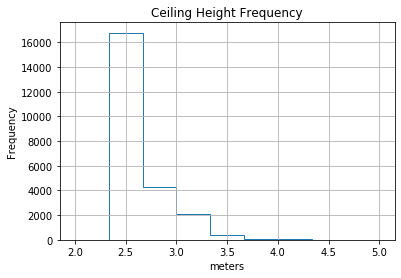

In [10]:
data.ceiling_height.plot(kind = 'hist', histtype = 'step', range = (2,5), bins = 9, title = 'Ceiling Height Frequency', grid = True)
plt.xlabel('meters')
plt.show()


На графике видим, что большинство значений лежит в диапазоне от 2.3-2.75 метра

## Столбец floors_total <a id="cell2.2"></a>

Почему здесь не хватает 86 записей, пока не понятно. Возможно это просто одноэтажные здания. Думаю соит даже отбросить эти данные, чтобы не мешали дальше.

In [11]:
na_records = data.floors_total.isna().sum()
print(f'Пропущенных значений до: {na_records}')

Пропущенных значений до: 86


In [12]:
display(data.loc[data.floors_total.isna(), interested_columns])
data[data.floors_total.isna()]['floor'].value_counts()

,last_price,total_area,rooms,ceiling_height,floors_total,floor
186,11640000.0,65.2,2,2.65,NaN,4
237,2438033.0,28.1,1,2.65,NaN,1
457,9788348.0,70.8,2,2.65,NaN,12
671,6051191.0,93.6,3,2.65,NaN,8
1757,3600000.0,39.0,1,2.65,NaN,9
...,...,...,...,...,...,...
22542,8500000.0,63.5,2,2.80,NaN,3
22656,4574160.0,64.5,2,2.65,NaN,20
22808,14569263.0,110.4,3,2.65,NaN,6
23590,21187872.0,123.3,3,2.65,NaN,18


4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Понять закономерность я так и не смог, но из данных видно, что в основном многоэтажные дома, так как этажи указаны разные вплоть до 24. Так что удалим эти записи, чтобы не было некорректных данных

In [13]:
median_total_floors = data.floors_total.median() # Медианное значения количества этажей:
print(f'Медианное значение количества этажей: {median_total_floors}')
data.dropna(subset = ['floors_total'],inplace = True)
print('Новая длина датасета:',len(data))
na_records = data.floors_total.isna().sum()
print(f'Пропущенных значений после: {na_records}')

Медианное значение количества этажей: 9.0
Новая длина датасета: 23574
Пропущенных значений после: 0


Также заметил, что тип данных здесь float, но количество этажей должно быть целочисленным. Так что изменим тип данных на int

In [14]:
print(f'Изначальный тип данных для столбца floors_total: {data.floors_total.dtype}')
data.floors_total = data.floors_total.astype('int')
print(f'Тип данных для столбца floors_total после замены: {data.floors_total.dtype}')
display(data.floors_total.head(15))

Изначальный тип данных для столбца floors_total: float64
Тип данных для столбца floors_total после замены: int64


0     16
1     11
2      5
3     14
4     14
5     12
6     26
7     24
8     27
9      9
10    12
11     5
12     5
13     5
14     6
Name: floors_total, dtype: int64

## Столбец living_area <a id=cell2.3></a>

In [15]:
na_records = data.living_area.isnull().sum()
print(f'Пропущенных значений до: {na_records}')

data.loc[data.living_area.isnull(), interested_columns + ['living_area']]

Пропущенных значений до: 1868


,last_price,total_area,rooms,ceiling_height,floors_total,floor,living_area
3,64900000.0,159.00,3,2.65,14,9,NaN
7,7915000.0,71.60,2,2.65,24,22,NaN
30,2200000.0,32.80,1,2.65,9,2,NaN
37,1990000.0,45.80,2,2.50,5,1,NaN
44,5350000.0,40.00,1,2.65,22,3,NaN
...,...,...,...,...,...,...,...
23642,5950000.0,80.30,3,2.70,12,5,NaN
23663,6400000.0,88.00,4,2.55,10,1,NaN
23670,2450000.0,45.60,1,2.80,9,2,NaN
23679,2500000.0,35.00,1,2.65,9,4,NaN


Здесь сделать замену сложнее. Попробую посчитать среднюю жилплощать основываясь на остальных данных, используя группировку по комнатам. Посмотрим что из этого выйдет.

In [16]:
def median_by_room(row):
    """Данная функция возвращает значение медианы жилой площади из сгруппированных значений по количеству комнат."""
    rooms = row['rooms']
    return grouped_by_room.loc[rooms]


# сгруппируем данные по комнатам и посчитаем медиану жилой площади
grouped_by_room = data.groupby('rooms').living_area.median() 
print('Группировка по комнатам:')
display(grouped_by_room.reset_index().rename(columns={'living_area': 'Median living area by rooms'}))

try:
    data['median_living_area'] = data.apply(median_by_room, axis = 1)
except:
    print('Возникла ошибка!')

data.loc[data.living_area.isnull(), 'living_area'] = data.loc[data.living_area.isnull(), 'median_living_area']

print("Количество пустых записей:", data.living_area.isnull().sum())

Группировка по комнатам:


,rooms,Median living area by rooms
0,0,18.00
1,1,17.60
2,2,30.50
3,3,45.00
4,4,63.50
5,5,91.77
6,6,123.90
7,7,145.00
8,8,161.00
9,9,179.20


Количество пустых записей: 0


In [17]:
display(data.loc[data.living_area > data.total_area,['total_area','rooms', 'living_area', 'median_living_area']])

,total_area,rooms,living_area,median_living_area
1595,62.4,4,63.50,63.50
3374,41.5,3,45.00,45.00
8976,41.2,3,45.00,45.00
9795,42.0,3,45.00,45.00
9964,49.5,4,63.50,63.50
11814,42.0,3,45.00,45.00
11977,62.0,4,63.50,63.50
12040,15.0,1,17.60,17.60
12129,30.0,2,30.50,30.50
12186,71.4,5,91.77,91.77


Получили несколько записей, где наша приравнивание медианы превзошло полную площадь, заменим в таких записях жилую площадь полным значением площади

In [18]:
data.loc[data.living_area > data.total_area, 'living_area'] = data.loc[data.living_area > data.total_area, 'total_area']
display(data.loc[data.living_area > data.total_area,['total_area','rooms', 'living_area', 'median_living_area']])

,total_area,rooms,living_area,median_living_area


Теперь все данные по жилой площади более менее урегулированы.

## Столбец is_apartment <a id=cell2.4></a>

В этом столбце перепутаны при сборе данных, где есть апартаменты а где нет. Нужно исправить текущие значения False на True, а все NaN перевести в False

In [19]:
display(data.is_apartment.describe())
data.loc[data.is_apartment == False, 'is_apartment'] = True

display(data.is_apartment.describe())
data.loc[data.is_apartment.isna(), 'is_apartment'] = False

display(data.is_apartment.describe())

count      2762
unique        2
top       False
freq       2715
Name: is_apartment, dtype: object

count     2762
unique       1
top       True
freq      2762
Name: is_apartment, dtype: object

count     23574
unique        2
top       False
freq      20812
Name: is_apartment, dtype: object

In [20]:
display(data.is_apartment.value_counts())
print(f'Количество пустых записей:',data.is_apartment.isna().sum())

False    20812
True      2762
Name: is_apartment, dtype: int64

Количество пустых записей: 0


## Столбец  kitchen_area <a id=cell2.5></a>

In [21]:
na_records = data.kitchen_area.isna().sum()
print(f'Количество пустых записей в столбце: {na_records}')
display(data.loc[data.rooms == 2,interested_columns + ['kitchen_area']])
display(data.loc[data.kitchen_area.isna(), interested_columns + ['kitchen_area']])

Количество пустых записей в столбце: 2222


,last_price,total_area,rooms,ceiling_height,floors_total,floor,kitchen_area
2,5196000.0,56.00,2,2.65,5,4,8.3
4,10000000.0,100.00,2,3.03,14,13,41.0
7,7915000.0,71.60,2,2.65,24,22,18.9
11,3300000.0,44.00,2,2.65,5,4,6.0
12,3890000.0,54.00,2,2.65,5,5,9.0
...,...,...,...,...,...,...,...
23681,5250000.0,43.00,2,2.50,5,2,6.0
23690,5500000.0,52.00,2,2.65,5,2,6.0
23691,9470000.0,72.90,2,2.75,25,7,10.6
23696,2500000.0,56.70,2,2.65,3,1,NaN


,last_price,total_area,rooms,ceiling_height,floors_total,floor,kitchen_area
3,64900000.0,159.0,3,2.65,14,9,NaN
30,2200000.0,32.8,1,2.65,9,2,NaN
37,1990000.0,45.8,2,2.50,5,1,NaN
44,5350000.0,40.0,1,2.65,22,3,NaN
59,6300000.0,46.5,1,2.65,13,13,NaN
...,...,...,...,...,...,...,...
23655,2414306.0,40.5,1,2.56,18,10,NaN
23663,6400000.0,88.0,4,2.55,10,1,NaN
23670,2450000.0,45.6,1,2.80,9,2,NaN
23679,2500000.0,35.0,1,2.65,9,4,NaN


Поступлю также, как я сделал со столбцом `living_area`, заполню все медианным сначением сгруппированным по комнатам.

In [22]:
# сгруппируем данные по комнатам и посчитаем медиану площади кухни
grouped_by_room = data.groupby('rooms').kitchen_area.median() 
display(grouped_by_room)

try:
    data['median_kitchen_area'] = data.apply(median_by_room, axis = 1)
except:
    print('Возникла ошибка!')

data.loc[data.kitchen_area.isnull(), 'kitchen_area'] = data.loc[data.kitchen_area.isnull(), 'median_kitchen_area']

print("Количество пустых записей:", data.kitchen_area.isnull().sum())

rooms
0         NaN
1       9.005
2       8.700
3       9.500
4      11.050
5      15.050
6      19.500
7      20.000
8      25.000
9      14.300
10     19.800
11     12.600
12    112.000
14     21.250
15    100.000
16     13.000
19     27.600
Name: kitchen_area, dtype: float64

Количество пустых записей: 192


In [23]:
display(data.loc[(data.kitchen_area.isna()) & ((data.studio == True) | (data.is_apartment == True) | (data.open_plan == True)), interested_columns + ['kitchen_area'] + ['studio'] + ['is_apartment']+['open_plan']])
print(f'Количество записей, где количество комнат равно 0: {len(data.loc[data.rooms == 0])}')

,last_price,total_area,rooms,ceiling_height,floors_total,floor,kitchen_area,studio,is_apartment,open_plan
144,2450000.0,27.00,0,2.65,24,2,NaN,True,False,False
349,2320000.0,25.00,0,2.65,14,1,NaN,False,False,True
440,2480000.0,27.11,0,2.65,17,4,NaN,True,False,False
508,3375000.0,34.40,0,2.65,26,19,NaN,False,False,True
608,1850000.0,25.00,0,2.65,10,7,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...
23210,3200000.0,26.00,0,2.65,25,16,NaN,True,False,False
23442,2500000.0,27.70,0,2.65,24,4,NaN,False,False,True
23554,3350000.0,26.00,0,2.65,19,8,NaN,True,False,False
23592,1450000.0,29.00,0,2.65,9,8,NaN,False,False,True


Количество записей, где количество комнат равно 0: 192


Нашли интересную закономерность. Записи со значением комнат = 0. Судя по данным, такие объявления являются либо студией, либо апартаментами, либо комнатой с открытой планировкой, соответственно в таких комнатах и пропущены значения для площади кухни. Возможно стоит заменить значения метрожа кухни на 0. Пока так и сделаем.

In [24]:
data.loc[data.kitchen_area.isna(), 'kitchen_area'] = 0
data.loc[data.rooms == 0, 'median_kitchen_area'] = 0
print("Количество пустых записей после преобразований:", data.kitchen_area.isnull().sum())

Количество пустых записей после преобразований: 0


## Столбец balcony <a id=cell2.6></a>

In [25]:
display(data.loc[data.balcony.isnull(), interested_columns + ['balcony']])
display(data.balcony.value_counts())

,last_price,total_area,rooms,ceiling_height,floors_total,floor,balcony
0,13000000.0,108.00,3,2.70,16,8,NaN
4,10000000.0,100.00,2,3.03,14,13,NaN
5,2890000.0,30.40,1,2.65,12,5,NaN
8,2900000.0,33.16,1,2.65,27,26,NaN
10,5050000.0,39.60,1,2.67,12,3,NaN
...,...,...,...,...,...,...,...
23692,1350000.0,30.00,1,2.65,5,4,NaN
23694,9700000.0,133.81,3,3.70,5,3,NaN
23695,3100000.0,59.00,3,2.65,5,4,NaN
23696,2500000.0,56.70,2,2.65,3,1,NaN


1.0    4187
0.0    3710
2.0    3647
5.0     301
4.0     182
3.0      81
Name: balcony, dtype: int64

Предположим, что люди просто забыли, что в данных квартирах нет балконов. Заменю все пропущенные значения на нули.

In [26]:
na_records = data.balcony.isna().sum()
print("Количество пустых записей до преобразований:", na_records)

data.balcony.fillna(value = 0, inplace = True)
na_records = data.balcony.isna().sum()
print("Количество пустых записей после преобразований:", na_records)

Количество пустых записей до преобразований: 11466
Количество пустых записей после преобразований: 0


## Столбец airports_nearest <a id=cell2.7></a>

In [27]:
data.airports_nearest.value_counts(dropna = False)

NaN        5521
37434.0      61
21928.0      32
44870.0      30
39946.0      30
           ... 
35587.0       1
50198.0       1
40942.0       1
13610.0       1
19470.0       1
Name: airports_nearest, Length: 8261, dtype: int64

Что же нам делать с этим столбцом, здесь 5532 пропущенных значения. Скорее всего эти данные собирались автоматически и их не получилось собрать корректно. Но как помню из других столбцов были схожие ситуации.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          23574 non-null float64
floors_total            23574 non-null int64
living_area             23574 non-null float64
floor                   23574 non-null int64
is_apartment            23574 non-null bool
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            23574 non-null float64
balcony                 23574 non-null float64
locality_name           23526 non-null object
airports_nearest        18053 non-null float64
cityCenters_nearest     18076 non-null float64
parks_around3000        18077 non-null float64
parks_nearest           8029 non-null float64
ponds_around3000  

In [29]:
mask = ((data.airports_nearest.isna()) & (data.cityCenters_nearest.isna()) & (data.parks_around3000.isna()) & (data.ponds_around3000.isna()))
print('Совместные пропуски в столбцах: ', len(data.loc[mask]))

Совместные пропуски в столбцах:  5497


Как видно из данных выше, то присутствуют 5508 совместных пропусков, думаю можно разделить данные на 2 части и попробовать их проанализировать по отдельности. Возможно в дальнейшем вскроются определенные инсайты.

Но прежде, чем сделать это, разберемся ещё с несколькими колонками: `locality_name` и `days_exposition`. А также изменим данные, где это необходимо. После этого разделим данные на 2 части и будем их анализировать отдельно.

## Столбец locality_name <a id=cell2.8></a>

In [30]:
display(data.locality_name.unique())
print(f'Количество уникальных записей до обработки:\n{len(data.locality_name.unique())}')

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Количество уникальных записей до обработки:
364


Что интересного можно заметить, это то, что есть одинаковое местоположение, но записано одно через посЕлок, другое через посЁлок. Также есть некоторые совпадения, когда где-то записано, к примеру, "поселок Мурино" и просто "Мурино" без поселка.
Ещё есть названия "посёлок городского типа" и "городской посёлок"

Сначала оставим во всех записях с поселками только букву "ё" для единообразия.
Далее сделаем категорию с поселками, после этого одиночные слова, можно сравнить со списком поселков, и если есть совпадения то заменить эту запись также на словосочетание "поселок + Имя_Поселка".


In [31]:
print(f'Количество уникальных записей до обработки:\n{len(data.locality_name.unique())}')
locality_new_name = data.locality_name.str.replace('поселок','посёлок')
locality_new_name = locality_new_name.str.replace('городской посёлок','посёлок городского типа')
print(f'Количество уникальных записей после обработки:\n{len(locality_new_name.unique())}')
data.locality_name.value_counts(dropna = False)
na_records = data.locality_name.isna().sum()
print(f"Количество пустых записей: {na_records}")
display(data[data.locality_name.isna()].head(10))

Количество уникальных записей до обработки:
364
Количество уникальных записей после обработки:
323
Количество пустых записей: 48


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5,50.80,2,False,...,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,45.0,9.500
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4,42.60,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,45.0,9.500
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24,15.60,3,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,17.6,9.005
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24,33.10,21,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,30.5,8.700
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5,30.80,5,False,...,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,30.5,8.700
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8,39.62,7,False,...,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,30.5,8.700
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4,52.30,3,True,...,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,45.0,9.500
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7,45.00,6,False,...,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,45.0,9.500
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.65,7,59.10,5,True,...,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,45.0,9.500
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.65,24,20.00,23,False,...,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,17.6,9.005


In [32]:
def locality_name_dict(names):
    """
    Данная функция создает словарь из листа имен,
    где ключ - имя населенного пункта,
    Значение - только название населенного пункта без его типа.
    """
    names_dict = {}
    for name in names:
        if name is np.nan:
            continue
        temp = name.split() 
        res = " ".join([ele for ele in temp if ele[0].isupper()])
        names_dict[name] = res
    return names_dict

        
#sample = ['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1']
names_dict = locality_name_dict(data.locality_name.unique())
#print(names_dict)

names_dict['посёлок Платформа 69-й километр'] = 'Платформа 69-й километр'
names_dict['посёлок Платформа 69-й километр']

'Платформа 69-й километр'

Так как восстановить местоположение этих объявлений не удастся, и так как их мало, то просто удалим их за не надобностью. 

In [33]:
data.dropna(subset = ['locality_name'], inplace = True)

In [34]:
locality_new_name1 = data.locality_name.apply(lambda x: names_dict[x])
data.locality_name = locality_new_name1
na_records = data.locality_name.isna().sum()
print(f"Количество пустых записей после преобразования: {na_records}")
print(f'Количество уникальных записей после обработки: {len(data.locality_name.unique())}')
print(f'Длина нового датасета: {len(data)}')

Количество пустых записей после преобразования: 0
Количество уникальных записей после обработки: 304
Длина нового датасета: 23526


In [35]:
data.locality_name.sample(15)

7345             Колпино
23576    Санкт-Петербург
8623     Санкт-Петербург
9194     Санкт-Петербург
20526          Новоселье
11610    Санкт-Петербург
1607              Пушкин
3283     Санкт-Петербург
2667              Шушары
3362     Санкт-Петербург
4933     Санкт-Петербург
177      Санкт-Петербург
22873             Пушкин
14813    Санкт-Петербург
6362     Санкт-Петербург
Name: locality_name, dtype: object

## Столбец days_exposition <a id=cell2.9></a>

NaN       3163
45.0       879
60.0       538
7.0        233
30.0       207
          ... 
1313.0       1
1021.0       1
1281.0       1
994.0        1
773.0        1
Name: days_exposition, Length: 1140, dtype: int64

count    20363.000000
mean       180.734911
std        219.764568
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

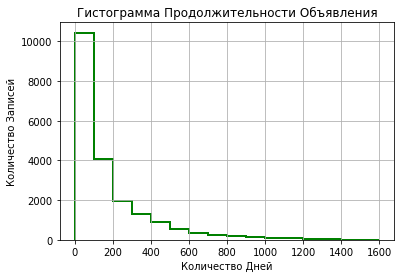

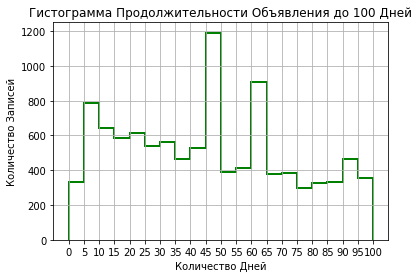

In [36]:
display(data.days_exposition.value_counts(dropna = False))
display(data.days_exposition.describe())
data.days_exposition.plot(kind = 'hist', bins = 16, range = (0,1600), title = 'Гистограмма Продолжительности Объявления', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.show()

data.days_exposition.plot(kind = 'hist', bins = 20, range = (0,100), title = 'Гистограмма Продолжительности Объявления до 100 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.xticks([x*5 for x in range(21)])
plt.show()

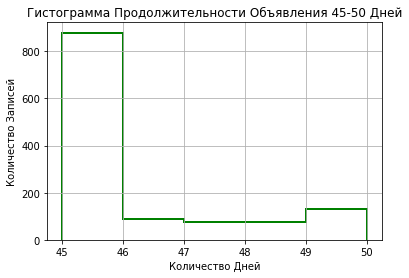

In [37]:
data.days_exposition.plot(kind = 'hist', bins = 5, range = (45,50), title = 'Гистограмма Продолжительности Объявления 45-50 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
#plt.xticks([x*5 for x in range(21)])
plt.show()

Оказалось, что только в 45 день получили около 850 проданных квартир... Что-то здесь явно не чисто.  
Я даже ещё не обработал данные на этом этапе.

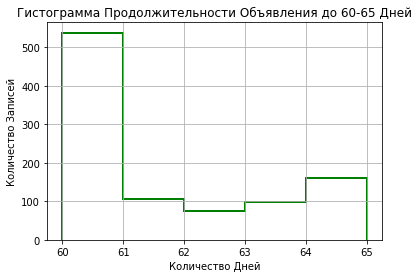

In [38]:
data.days_exposition.plot(kind = 'hist', bins = 5, range = (60,65), title = 'Гистограмма Продолжительности Объявления до 60-65 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
#plt.xticks([x*5 for x in range(21)])
plt.show()

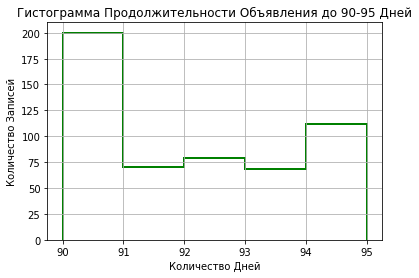

In [39]:
data.days_exposition.plot(kind = 'hist', bins = 5, range = (90,95), title = 'Гистограмма Продолжительности Объявления до 90-95 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
#plt.xticks([x*5 for x in range(21)])
plt.show()

### Вывод: <a id=cell2.9.1></a>

   Чтобы заполнить пропуски в данных столбца `days_exposition`, необходимо понять временной диапазон когда наблюдались эти объявления. Для этого необходимо перевести столбец `first_day_exposition` в datetime формат. После добавим новый столбец последний день объявления, использовав столбец `days_exposition` как timedelta. А дальше в этом новом столбце найдем максимальное значение и уже от него будем отсчитывать дни для заполнения пропусков объявления. 
    
   Ещё один занимательный факт: много объявлений (почти четверть) попали в диапазон от 0 до 50 дней. Возможно что-то здесь не так, так как это слишком быстрые продажи, может здесь есть мошенническая деятельность.

### Замена типов данных <a id=cell2.10> </a>

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23526 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23526 non-null int64
last_price              23526 non-null float64
total_area              23526 non-null float64
first_day_exposition    23526 non-null object
rooms                   23526 non-null int64
ceiling_height          23526 non-null float64
floors_total            23526 non-null int64
living_area             23526 non-null float64
floor                   23526 non-null int64
is_apartment            23526 non-null bool
studio                  23526 non-null bool
open_plan               23526 non-null bool
kitchen_area            23526 non-null float64
balcony                 23526 non-null float64
locality_name           23526 non-null object
airports_nearest        18013 non-null float64
cityCenters_nearest     18036 non-null float64
parks_around3000        18037 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000  

Необходимо поменять на целочисленные типы столбцы: `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`


Необходимо поменять на DateTime столбец: `first_day_exposition`

In [41]:
data.first_day_exposition.head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

Идея с заменой типов данных конечно хороша, но как оказалось нельзя сделать integer вместе с nan. Придется сначала разделить данные и заполнить пропуски, а потом уже перевести в целочисленный тип, или не переводить, в принципе и так нормально же.

In [42]:
try:
    data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format="%Y-%m-%dT%H:%M:%S")
except:
    print("Не удалось перевести в формат даты")
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23526 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23526 non-null int64
last_price              23526 non-null float64
total_area              23526 non-null float64
first_day_exposition    23526 non-null datetime64[ns]
rooms                   23526 non-null int64
ceiling_height          23526 non-null float64
floors_total            23526 non-null int64
living_area             23526 non-null float64
floor                   23526 non-null int64
is_apartment            23526 non-null bool
studio                  23526 non-null bool
open_plan               23526 non-null bool
kitchen_area            23526 non-null float64
balcony                 23526 non-null float64
locality_name           23526 non-null object
airports_nearest        18013 non-null float64
cityCenters_nearest     18036 non-null float64
parks_around3000        18037 non-null float64
parks_nearest           8014 non-null float64
ponds_arou

In [43]:
data.loc[data.days_exposition.isna(), 'days_exposition'] = -1
print(f'Количество пустых записей: {data.days_exposition.isna().sum()}')

Количество пустых записей: 0


Сделал замену пустых значений на -1, чтобы перевести этот столбец в int. Дальше собираюсь сделать новый столбец last_day_exposition прибавив через timedelta значения days_exposition. После этого вычислю максимальный день продажи и уже от него посчитаю количество дней для пропущенных значений. 

In [44]:
try:
    data.days_exposition = data.days_exposition.astype('int')
except:
    print("Что-то пошло не так, ошибка при преобразовании данных!")
    
print(data.days_exposition.dtype)

int64


In [45]:
data.query('days_exposition < 0').first_day_exposition.nunique()
data.query('days_exposition < 0').first_day_exposition.value_counts()

2019-04-22    46
2019-04-18    44
2019-04-08    36
2019-04-04    36
2019-04-29    36
              ..
2017-08-22     1
2016-08-04     1
2018-08-29     1
2016-11-02     1
2018-12-21     1
Name: first_day_exposition, Length: 706, dtype: int64

In [46]:
data['last_day_exposition'] = data.first_day_exposition + pd.to_timedelta(data.days_exposition, 'days')
display(data.loc[:,['first_day_exposition', 'days_exposition', 'last_day_exposition']].head(10))

,first_day_exposition,days_exposition,last_day_exposition
0,2019-03-07,-1,2019-03-06
1,2018-12-04,81,2019-02-23
2,2015-08-20,558,2017-02-28
3,2015-07-24,424,2016-09-20
4,2018-06-19,121,2018-10-18
5,2018-09-10,55,2018-11-04
6,2017-11-02,155,2018-04-06
7,2019-04-18,-1,2019-04-17
8,2018-05-23,189,2018-11-28
9,2017-02-26,289,2017-12-12


In [47]:
time_limit = data.last_day_exposition.max()
time_limit1 = data.first_day_exposition.max()
print(time_limit)
print(time_limit1)

td = time_limit1 - data.first_day_exposition
data['td'] = td.apply(lambda x: x.days)
data.loc[data.days_exposition < 0, 'days_exposition'] = data.loc[data.days_exposition < 0, 'td']
display(data.loc[:,['first_day_exposition', 'days_exposition', 'last_day_exposition','td']].head(10))
print((data.last_day_exposition == time_limit).sum())

2019-05-02 00:00:00
2019-05-03 00:00:00


,first_day_exposition,days_exposition,last_day_exposition,td
0,2019-03-07,57,2019-03-06,57
1,2018-12-04,81,2019-02-23,150
2,2015-08-20,558,2017-02-28,1352
3,2015-07-24,424,2016-09-20,1379
4,2018-06-19,121,2018-10-18,318
5,2018-09-10,55,2018-11-04,235
6,2017-11-02,155,2018-04-06,547
7,2019-04-18,15,2019-04-17,15
8,2018-05-23,189,2018-11-28,345
9,2017-02-26,289,2017-12-12,796


48


Как в последствии выяснилось, максимальное время оказалось в столбце `first_day_exposition` и является 2019-05-03 00:00:00

Теперь после преобразований, обновим и последний день экспозиции.

In [48]:
data['last_day_exposition'] = data.first_day_exposition + pd.to_timedelta(data.days_exposition, 'days')

In [49]:
display(data.loc[data.days_exposition <= 0, ['first_day_exposition', 'days_exposition', 'last_day_exposition']])

,first_day_exposition,days_exposition,last_day_exposition
2178,2019-05-03,0,2019-05-03
3254,2019-05-03,0,2019-05-03
4450,2019-05-03,0,2019-05-03
5986,2019-05-03,0,2019-05-03
8170,2019-05-03,0,2019-05-03
9217,2019-05-03,0,2019-05-03
10917,2019-05-03,0,2019-05-03
12003,2019-05-03,0,2019-05-03
12208,2019-05-03,0,2019-05-03
12343,2019-05-03,0,2019-05-03


Видно, что после преобразований у нас осталось только 20 записей с количеством дней равном нулю, эти объявления были вывешены в последний день нашего временного периода. Посмотрим как изменился наш [график](#cell2.9) распределения.

count    23526.000000
mean       185.742710
std        233.526986
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

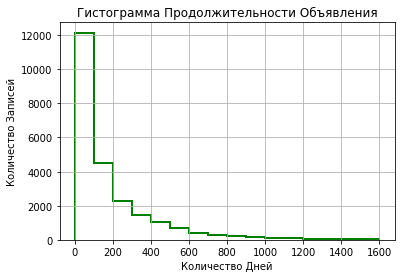

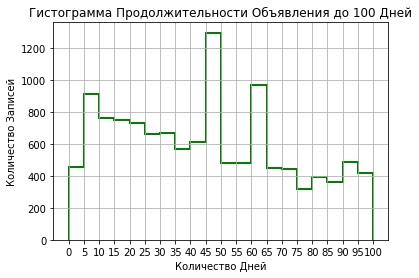

In [50]:
display(data.days_exposition.describe())
data.days_exposition.plot(kind = 'hist', bins = 16, range = (0,1600), title = 'Гистограмма Продолжительности Объявления', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.show()

data.days_exposition.plot(kind = 'hist', bins = 20, range = (0,100), title = 'Гистограмма Продолжительности Объявления до 100 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.xticks([x*5 for x in range(21)])
plt.show()

Видно по графику до 100 дней, что у нас присутствует 4 пика: от 5 до 10 дней 800 объявлений, дальше идет практически равномерный пласт в 600 объявлений от 10 до 45 объявлений. Дальше резкий пик в 1200 объявлений для 45-50 дней. После резкий спад на уровень в 400 объявлений от 50 до 60 дней. Дальше снова резкий пик в 900 объявлений для 60-65 дней. Дальше спад до уровня 350 объявлений, и небольшой подъем в отметке 90-95 дней в виде 450 объявлений.


Если рассматривать в целом распределение по всем дням, то у нас график с основным пиком и очень-очень длинным хвостом данных справа. Но в целом это распределение похоже на пауссоновское. Скорее всего это хорошо.

## Выделение хороших  и не очень данных <a id=cell2.11></a>

Сделаем условие, когда в ближайших аэропортах, ближайших центрах, в парках и прудах в пределах 3000м - записи одновременно NaN

In [51]:
mask = ((data.airports_nearest.isna()) & (data.cityCenters_nearest.isna()) & (data.parks_around3000.isna()) & (data.ponds_around3000.isna()))
good_data = data.loc[~mask]
not_all_good_data = data.loc[mask]
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 23697
Data columns (total 26 columns):
total_images            18037 non-null int64
last_price              18037 non-null float64
total_area              18037 non-null float64
first_day_exposition    18037 non-null datetime64[ns]
rooms                   18037 non-null int64
ceiling_height          18037 non-null float64
floors_total            18037 non-null int64
living_area             18037 non-null float64
floor                   18037 non-null int64
is_apartment            18037 non-null bool
studio                  18037 non-null bool
open_plan               18037 non-null bool
kitchen_area            18037 non-null float64
balcony                 18037 non-null float64
locality_name           18037 non-null object
airports_nearest        18013 non-null float64
cityCenters_nearest     18036 non-null float64
parks_around3000        18037 non-null float64
parks_nearest           8014 non-null float64
ponds_arou

In [52]:
try:
    good_data.loc[:,['balcony']] = good_data.balcony.astype('int')
    good_data.loc[:,['parks_around3000']] = good_data.parks_around3000.astype('int')
    good_data.loc[:,['ponds_around3000']] = good_data.ponds_around3000.astype('int')
except:
    print('Ошибка при преобразовании данных в целочисленный тип!')
    

In [53]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 23697
Data columns (total 26 columns):
total_images            18037 non-null int64
last_price              18037 non-null float64
total_area              18037 non-null float64
first_day_exposition    18037 non-null datetime64[ns]
rooms                   18037 non-null int64
ceiling_height          18037 non-null float64
floors_total            18037 non-null int64
living_area             18037 non-null float64
floor                   18037 non-null int64
is_apartment            18037 non-null bool
studio                  18037 non-null bool
open_plan               18037 non-null bool
kitchen_area            18037 non-null float64
balcony                 18037 non-null int64
locality_name           18037 non-null object
airports_nearest        18013 non-null float64
cityCenters_nearest     18036 non-null float64
parks_around3000        18037 non-null int64
parks_nearest           8014 non-null float64
ponds_around30

In [54]:
display(good_data.loc[good_data.airports_nearest.isna(), interested_columns + ['airports_nearest'] +['cityCenters_nearest'] + ['locality_name']])
display(good_data.query('locality_name == "Санкт-Петербург"').airports_nearest.describe())
median_airport = good_data.query('locality_name == "Санкт-Петербург"').airports_nearest.median()

,last_price,total_area,rooms,ceiling_height,floors_total,floor,airports_nearest,cityCenters_nearest,locality_name
733,18700000.0,109.7,3,2.75,21,13,NaN,13355.0,Санкт-Петербург
974,25897000.0,149.0,4,2.74,7,6,NaN,9734.0,Санкт-Петербург
2415,9500000.0,67.4,2,2.80,23,4,NaN,13355.0,Санкт-Петербург
7521,43500000.0,245.8,3,4.45,7,7,NaN,5735.0,Санкт-Петербург
7542,6900000.0,50.0,1,2.80,23,12,NaN,13355.0,Санкт-Петербург
8018,84000000.0,507.0,5,4.45,7,7,NaN,5735.0,Санкт-Петербург
8628,8000000.0,48.9,1,2.65,6,4,NaN,5735.0,Санкт-Петербург
9054,13000000.0,71.8,2,2.75,10,5,NaN,9734.0,Санкт-Петербург
9880,5300000.0,51.0,2,2.65,5,4,NaN,4892.0,Санкт-Петербург
10669,3400000.0,46.0,2,2.60,5,5,NaN,21377.0,Санкт-Петербург


count    15541.000000
mean     28045.550286
std      11552.781171
min          0.000000
25%      18574.000000
50%      26765.000000
75%      36592.000000
max      54784.000000
Name: airports_nearest, dtype: float64

Посмотрел по карте, расстояние от центра Питера до аэропорта Пулково - 20 километров. Медиана здесь же 26.8 км, так что можно смело заменить эти пропущенные данные медианой.

In [55]:
good_data.loc[good_data.airports_nearest.isna(), 'airports_nearest'] = median_airport
print("Количество пустых записей:", good_data.airports_nearest.isna().sum())

Количество пустых записей: 0


Посмотрим теперь на пропущенную запись с ближайшим городским центром. `cityCenters_nearest`

In [56]:
good_data.loc[good_data.cityCenters_nearest.isna(),interested_columns + ['airports_nearest'] +['cityCenters_nearest'] + ['locality_name']]

,last_price,total_area,rooms,ceiling_height,floors_total,floor,airports_nearest,cityCenters_nearest,locality_name
20190,10500000.0,85.0,3,3.0,3,2,15527.0,NaN,Пушкин


In [57]:
print('Количество объявлений с городом Пушкин:', len(good_data.query('locality_name == "Пушкин"')))
display(good_data.query('locality_name == "Пушкин"').cityCenters_nearest.head(10))
median_cc_pushkin = good_data.query('locality_name == "Пушкин"').cityCenters_nearest.median()
good_data.loc[good_data.cityCenters_nearest.isna(), 'cityCenters_nearest'] = median_cc_pushkin
print("Количество пустых записей после замены:", len(good_data.loc[good_data.cityCenters_nearest.isna()]))

Количество объявлений с городом Пушкин: 369


14     30759.0
28     30710.0
50     30183.0
109    26670.0
126    32546.0
140    26506.0
387    31413.0
419    30937.0
439    26845.0
474    32291.0
Name: cityCenters_nearest, dtype: float64

Количество пустых записей после замены: 0


Заменил отсутствующую запись в `cityCenters_nearest` медианным значением в городе Пушкин

Посмотрим на оставшиеся пропуски в столбцах `parks_nearest` и `ponds_nearest`.  
Эти столбцы указывают на ближайшее местоположение парка или пруда.
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)

count    8014.000000
mean      490.678687
std       341.782230
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

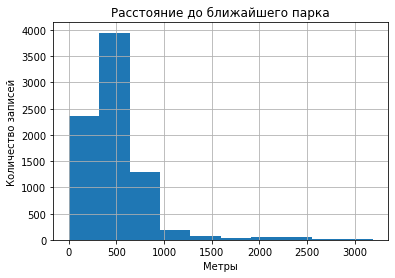

count    9019.000000
mean      518.596408
std       278.031871
min        13.000000
25%       293.000000
50%       503.000000
75%       731.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

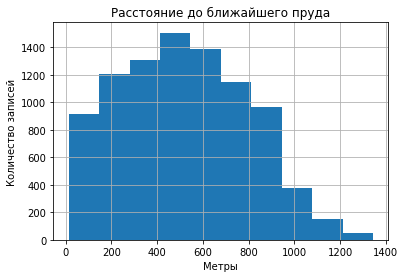

In [58]:
display(good_data.parks_nearest.describe())
good_data.parks_nearest.hist()
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество записей')
plt.show()
display(good_data.ponds_nearest.describe())
good_data.ponds_nearest.hist()
plt.title('Расстояние до ближайшего пруда')
plt.xlabel('Метры')
plt.ylabel('Количество записей')
plt.show()

Как видно из гистограм выше, расстояние до парков и прудов не превышает 3 км.  
Теперь посмотрим связано ли это еще и с записями где отсутствуют значения и нет рядом парков в пределах 3 км.

In [59]:
na_records = good_data.parks_nearest.isna().sum()
print('Количество пустых записей:', na_records)
print('Количество записей с 0 парками:', len(good_data.query('parks_around3000 == 0')))

Количество пустых записей: 10023
Количество записей с 0 парками: 10027


In [60]:
print('Совместное количество записей:', len(good_data.query('parks_around3000 == 0 and parks_nearest.isna()')))

Совместное количество записей: 10023


In [61]:
good_data.parks_nearest.fillna(value = 0, inplace = True)
na_records = good_data.parks_nearest.isna().sum()
print('Количество пустых записей после обработки:', na_records)

Количество пустых записей после обработки: 0


In [62]:
na_records = good_data.ponds_nearest.isna().sum()
print('Количество пустых записей:', na_records)
print('Количество записей с 0 прудами:', len(good_data.query('ponds_around3000 == 0')))

Количество пустых записей: 9018
Количество записей с 0 прудами: 9018


In [63]:
print('Совместное количество записей:', len(good_data.query('ponds_around3000 == 0 and ponds_nearest.isna()')))

Совместное количество записей: 9018


In [64]:
good_data.ponds_nearest.fillna(value = 0, inplace = True)
na_records = good_data.ponds_nearest.isna().sum()
print('Количество пустых записей после обработки:', na_records)

Количество пустых записей после обработки: 0


### Вывод
Мы заменили в столбцах с ближайшими парками и прудами пропущенные значения на нули, так как эти значения означают, что вблизи 3 км нет ни одного пруда.

In [65]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 23697
Data columns (total 26 columns):
total_images            18037 non-null int64
last_price              18037 non-null float64
total_area              18037 non-null float64
first_day_exposition    18037 non-null datetime64[ns]
rooms                   18037 non-null int64
ceiling_height          18037 non-null float64
floors_total            18037 non-null int64
living_area             18037 non-null float64
floor                   18037 non-null int64
is_apartment            18037 non-null bool
studio                  18037 non-null bool
open_plan               18037 non-null bool
kitchen_area            18037 non-null float64
balcony                 18037 non-null int64
locality_name           18037 non-null object
airports_nearest        18037 non-null float64
cityCenters_nearest     18037 non-null float64
parks_around3000        18037 non-null int64
parks_nearest           18037 non-null float64
ponds_around3

## Поиск дубликатов

In [66]:
print("Дубликотов в данных:", good_data.duplicated().sum())

Дубликотов в данных: 0


# Шаг 3. Посчитайте и добавьте в таблицу <a id=cell3></a>

## Расчет цены квадратного метра <a id=cell3.1 ></a>

count    1.803700e+04
mean     1.105853e+05
std      4.998444e+04
min      1.118349e+02
25%      8.750000e+04
50%      1.016667e+05
75%      1.209781e+05
max      1.907500e+06
Name: cost_m2, dtype: float64

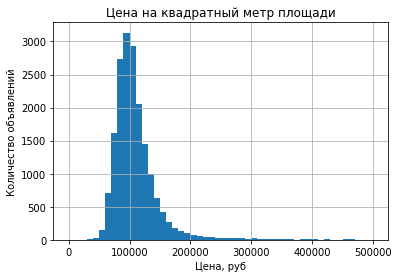

In [67]:
df = good_data
data['cost_m2'] = data.last_price / data.total_area
df['cost_m2'] = df.last_price / df.total_area
display(df.cost_m2.describe())
df.cost_m2.hist(range = (0,500000), bins = 50)
plt.title('Цена на квадратный метр площади')
plt.xlabel('Цена, руб')
plt.ylabel('Количество объявлений')
plt.show()


### Вывод:

Из графика выше видно, что в среднем пик цен приходится где-то на 100000р за квадратный метр.
Ну и есть пару объектов, где цена за квадратный метр почти 2 миллиона, но это уже редкость и выбросы скорее всего.  
Основная масса цен находится в диапазоне от 50-150 тыс. рублей за кв. метр.

## Добавление дня недели, месяц и год публикации объявления <a id=cell3.2 ></a>

In [68]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # Получение года из столбца с датой и временем
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # Получение месяца из столбца с датой и временем
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # Получение дня недели из столбца с датой и временем

display(data.loc[:,['year','month','day']].head())
display(data.groupby(['year']).month.count().reset_index().rename(columns = {'month': 'count'}))
#display(data.groupby(['year','month']).month.agg('count'))

,year,month,day
0,2019,3,3
1,2018,12,1
2,2015,8,3
3,2015,7,4
4,2018,6,1


,year,count
0,2014,136
1,2015,1162
2,2016,2744
3,2017,8147
4,2018,8473
5,2019,2864


In [69]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # Получение года из столбца с датой и временем
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month # Получение месяца из столбца с датой и временем
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday # Получение дня недели из столбца с датой и временем

display(df.loc[:,['year','month','day']].head())
display(df.groupby(['year']).month.count().reset_index().rename(columns = {'month': 'count'}))
display(df.groupby(['year','month']).month.agg('count'))

,year,month,day
0,2019,3,3
1,2018,12,1
2,2015,8,3
3,2015,7,4
4,2018,6,1


,year,count
0,2014,114
1,2015,953
2,2016,2151
3,2017,6395
4,2018,6232
5,2019,2192


year  month
2014  11        20
      12        94
2015  1         53
      2         52
      3         89
      4         40
      5         51
      6         76
      7         72
      8         78
      9         72
      10       116
      11       126
      12       128
2016  1         89
      2        199
      3        271
      4        308
      5        330
      6        367
      7        115
      8         62
      9         94
      10       112
      11       111
      12        93
2017  1        228
      2        348
      3        174
      4        522
      5        440
      6        523
      7        471
      8        599
      9        802
      10       705
      11       962
      12       621
2018  1        420
      2        981
      3        725
      4        226
      5        120
      6        376
      7        648
      8        617
      9        560
      10       692
      11       616
      12       251
2019  1        325
      2        439


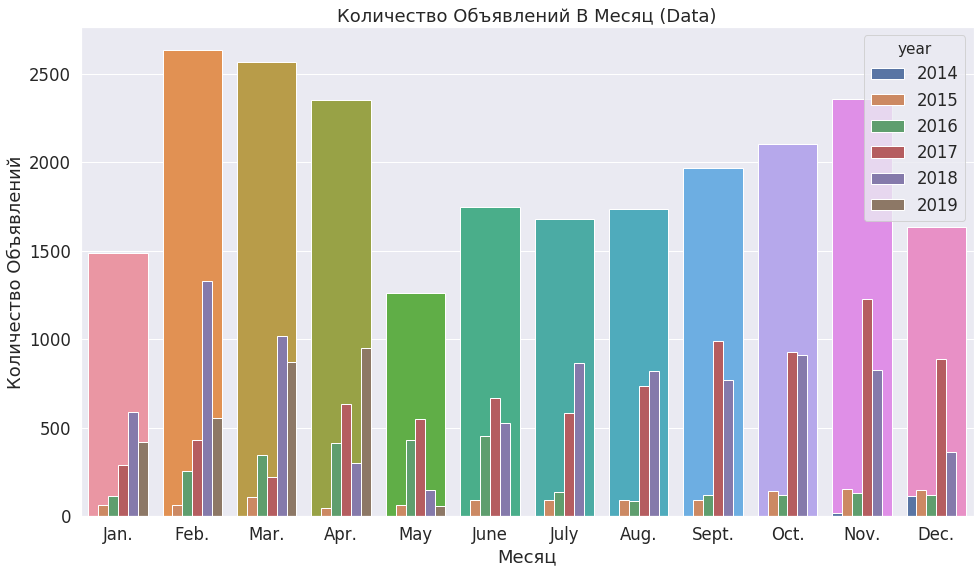

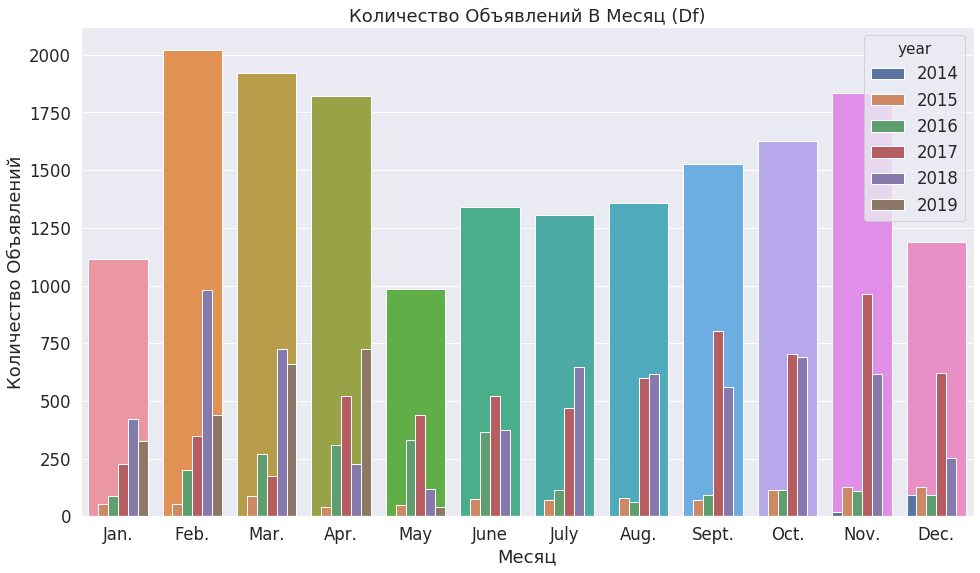

In [70]:
month_names = ['Январь','Февраль','Март','Апрель', "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
eng_month_names = ["Jan.","Feb.","Mar.","Apr.","May","June","July","Aug.","Sept.","Oct.","Nov.", "Dec."]

sns.set_style("darkgrid")
sns.set(font_scale = 1.5)

plt.figure(figsize = (16,9))
sns.barplot(data = data, x = 'month', y = 'year', estimator = len)


sns.barplot(data = data, x = 'month', y = 'year', hue = 'year', estimator = len)
plt.xticks(range(0,12),eng_month_names)
plt.title('Количество объявлений в месяц (data)'.title())
plt.xlabel('Месяц')
plt.ylabel('Количество Объявлений')
plt.show()


plt.figure(figsize = (16,9))
sns.barplot(data = df, x = 'month', y = 'year', estimator = len)



sns.barplot(data = df, x = 'month', y = 'year', hue = 'year', estimator = len)
plt.title('Количество объявлений в месяц (df)'.title())
plt.xlabel('Месяц')
plt.ylabel('Количество Объявлений')
plt.xticks(range(0,12),eng_month_names)
plt.show()



### Вывод
Как видно из графика выше: лидеры по обявлениям: февраль 2018 и ноябрь 2017  
Если смотреть в общем по количеству объявлений в месяц, но без разделения по годам, то лидируют месяцы: февраль, март, апрель и ноябрь.

## Категоризация этажа квартиры <a id = cell3.3></a>

In [71]:
def floor_cat(row):
    if row.floor == 1:
        return 'Первый'
    elif row.floor == row.floors_total:
        return 'Последний'
    return 'Другой'
    

df['floor_cat'] = df.apply(floor_cat, axis = 1)

In [72]:
df.floor_cat.value_counts(dropna = False)

Другой       13731
Последний     2317
Первый        1989
Name: floor_cat, dtype: int64

## Вычисление долей жилой и кухонной площадей по отношению к общей площади <a id = cell3.4></a>

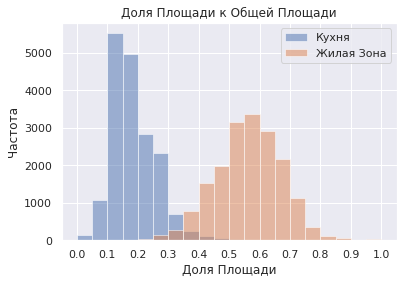

In [73]:
df['kitchen_part'] = df.kitchen_area / df.total_area
df['living_part'] = df.living_area / df.total_area

sns.set(font_scale = 1)
ax = df.kitchen_part.plot(kind = 'hist',label = "Кухня",bins = 20, range = (0,1), alpha = 0.5)
df.living_part.plot(kind = 'hist', ax = ax, label = "Жилая Зона",bins = 20, range = (0,1), alpha = 0.5)
plt.title("Доля Площади к Общей Площади")
plt.xlabel('Доля Площади')
plt.ylabel("Частота")
plt.xticks([x*0.1 for x in range(11)])
plt.legend()
plt.show()

### Вывод
Добавили столбцы с долей площадей жилой зоны и кухни.  
Как видно из гистограммы кухня занимает от 10-20% пространства, жилая зона же занимает в среднем около 60%.

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id=cell4></a>

Для начала напишу функцию для вывода гистограммы.

In [74]:
def print_hist(data, column, x_label, y_label, title, limits = (0,1000000), bins = 20):
    """
    Данная функция выводит описательные данные и гистограму, сразу с подписями к осям, заголовком,
    а также можно регулировать пределы и количество бинов
    """
    display(data[column].describe())
    data[column].plot(kind = 'hist', range = limits, bins = bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

## Изучение распределения площади квартир <a id=cell4.1></a>

count    23526.000000
mean        60.290821
std         35.530347
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

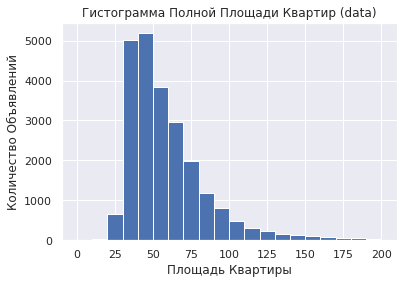

count    18037.000000
mean        63.300282
std         38.640227
min         12.000000
25%         41.200000
50%         54.000000
75%         73.000000
max        900.000000
Name: total_area, dtype: float64

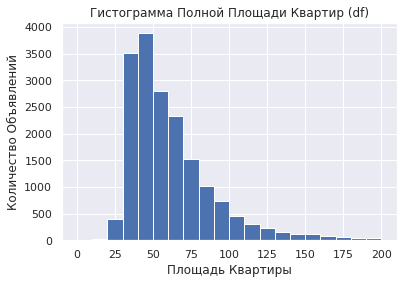

In [75]:
print_hist(data, 'total_area', 'Площадь Квартиры', 'Количество Объявлений', "Гистограмма Полной Площади Квартир (data)", (0,200))
print_hist(df, 'total_area', 'Площадь Квартиры', 'Количество Объявлений', "Гистограмма Полной Площади Квартир (df)", (0,200))

### Вывод: <a id=cell4.1.1></a>
Из графиков выше видим распределения по полной площади квартир для полных данных (data) и обработанных (df). В целом видно, что после 200 квадратных метров уже нет объявлений. В целом графики для полных и обработанных данных выглядят одинаково. Площадь плотно распределена от 30 - 80 квадратных метров, с медианными значениями 52 и 54 кв.метра соответственно.
Есть много единичных объявлений с полощадями больше 200 кв. метров.

Объявлений с площадью больше 200 кв. метров: 223


count    23526.000000
mean        60.290821
std         35.530347
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

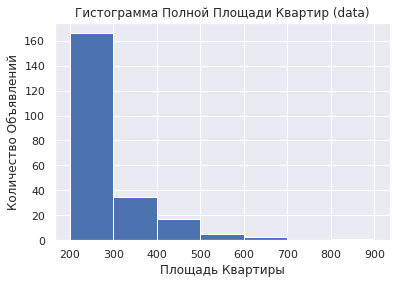

In [76]:
print("Объявлений с площадью больше 200 кв. метров:", len(df.query('total_area >= 200')))
print_hist(data, 'total_area', 'Площадь Квартиры', 'Количество Объявлений', "Гистограмма Полной Площади Квартир (data)", (200,900), bins = 7)


## Изучение распределения цены квартир <a id=cell4.2></a>

count    2.352600e+04
mean     6.525268e+06
std      1.083701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

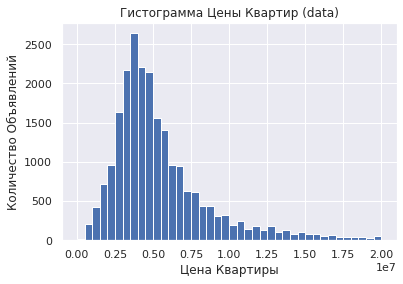

count    1.803700e+04
mean     7.555401e+06
std      1.208549e+07
min      1.219000e+04
25%      4.000000e+06
50%      5.250000e+06
75%      7.680000e+06
max      7.630000e+08
Name: last_price, dtype: float64

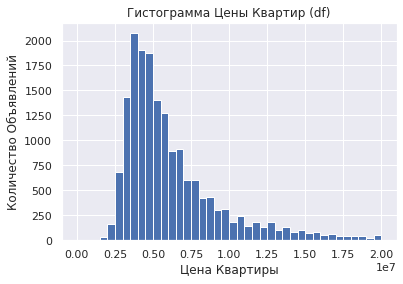

In [77]:
print_hist(data, 'last_price', 'Цена Квартиры', 'Количество Объявлений', "Гистограмма Цены Квартир (data)", limits = (0,20000000), bins = 40)
print_hist(df, 'last_price', 'Цена Квартиры', 'Количество Объявлений', "Гистограмма Цены Квартир (df)", limits = (0,20000000), bins = 40)

In [78]:
print('Количество объявлений с ценой квартиры больше 20 млн:', len(data.query('last_price > 20000000')))

Количество объявлений с ценой квартиры больше 20 млн: 699


count    2.692000e+03
mean     2.105581e+07
std      2.753573e+07
min      1.000565e+07
25%      1.190000e+07
50%      1.436500e+07
75%      2.085000e+07
max      7.630000e+08
Name: last_price, dtype: float64

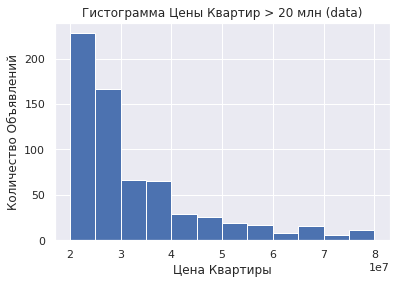

In [79]:
print_hist(data.query('last_price > 10*10**6'), 'last_price', 'Цена Квартиры', 'Количество Объявлений', "Гистограмма Цены Квартир > 20 млн (data)", limits = (20*10**6,80*10**6), bins = 12)

### Вывод: <a id=cell4.2.1></a>

Основной массив объявлений лежит в диапазоне от 2.5 - 8 млн рублей. Есть ценовой сегмент > 10 млн, который составляет около 10% датасета.
Можно заметить, что в обработанных данных также обрезался дешёвый ценовой сегмент ( ниже 1.5 млн рублей почти и нет объявлений)

## Изучение распределения количества комнат <a id=cell4.3></a>

count    23526.000000
mean         2.070560
std          1.078174
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

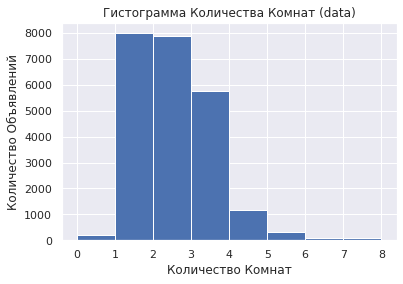

count    18037.000000
mean         2.139380
std          1.123046
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

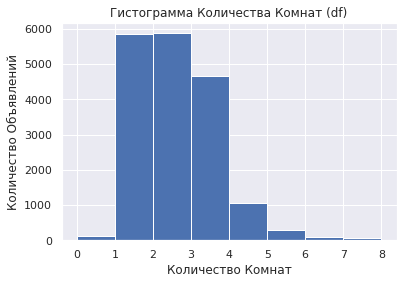

In [80]:
print_hist(data, 'rooms', 'Количество Комнат', 'Количество Объявлений', "Гистограмма Количества Комнат (data)", limits = (0, 8), bins = 8)
print_hist(df, 'rooms', 'Количество Комнат', 'Количество Объявлений', "Гистограмма Количества Комнат (df)", limits = (0, 8), bins = 8)

In [81]:
print('Количество объявлений с 8 и более комнатами:', len(data.query('rooms >= 8')))
display(data.query('rooms >= 8').rooms.value_counts())

Количество объявлений с 8 и более комнатами: 31


8     12
9      8
10     3
14     2
11     2
19     1
16     1
15     1
12     1
Name: rooms, dtype: int64

### Вывод: <a id=cell4.3.1></a>

Ну в принципе ничего удивительного, большинство объявлений с 1,2,3 комнатами.
Есть ещё 31 объявление, где количество комнат от 8 и более.

## Изучение распределения высоты потолков <a id=cell4.4></a>

count    23526.000000
mean         2.696132
std          0.215944
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

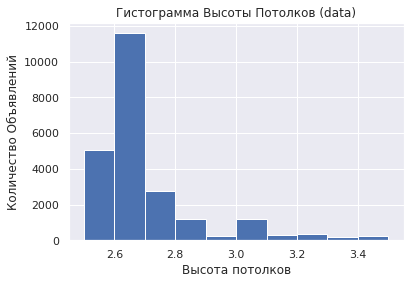

count    18037.000000
mean         2.712356
std          0.232739
min          2.000000
25%          2.600000
50%          2.650000
75%          2.730000
max          4.900000
Name: ceiling_height, dtype: float64

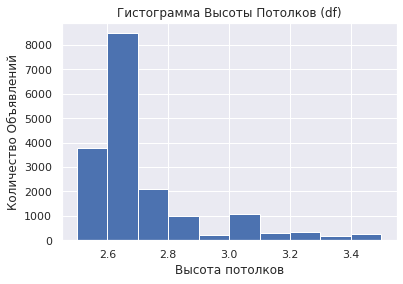

In [82]:
print_hist(data, 'ceiling_height', 'Высота потолков', 'Количество Объявлений', "Гистограмма Высоты Потолков (data)", limits = (2.5, 3.5), bins = 10)
print_hist(df, 'ceiling_height', 'Высота потолков', 'Количество Объявлений', "Гистограмма Высоты Потолков (df)", limits = (2.5, 3.5), bins = 10)

### Вывод: <a id=cell4.4.1></a>

Анализ высоты потолков качественно проведен в предобработке данных [ссылка](#cell2.1).
В целом высота потолков как и должна быть от 2.5 - 3 метров распределена. Ну и так как было много пропусков, то медианное значение 2.65м выделяется соответственно

## Анализ времени продажи квартиры <a id=cell4.5></a>

Тщательный анализ времени продажи квартир приведен в предобработке данных, здесь ещё раз выведу гистограммы [ссылка](#cell2.10)

count    23526.000000
mean       185.742710
std        233.526986
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

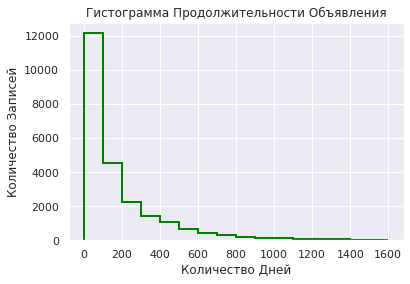

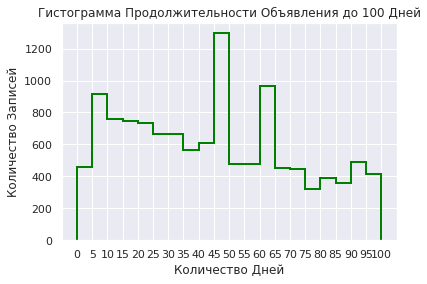

In [83]:
display(data.days_exposition.describe())
data.days_exposition.plot(kind = 'hist', bins = 16, range = (0,1600), title = 'Гистограмма Продолжительности Объявления', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.show()

data.days_exposition.plot(kind = 'hist', bins = 20, range = (0,100), title = 'Гистограмма Продолжительности Объявления до 100 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.xticks([x*5 for x in range(21)])
plt.show()

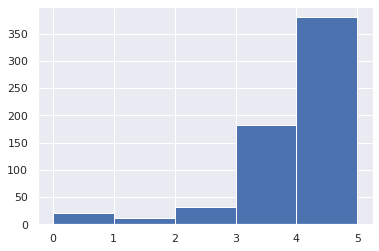

In [84]:
data.query('days_exposition <= 5').days_exposition.hist(bins = 5)

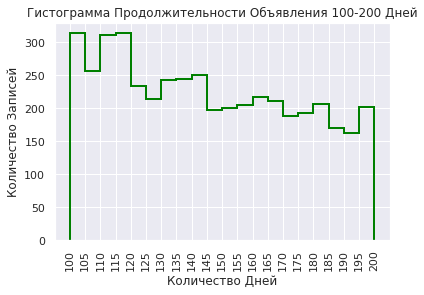

In [85]:
data.days_exposition.plot(kind = 'hist', bins = 20, range = (100,200), title = 'Гистограмма Продолжительности Объявления 100-200 Дней', histtype = 'step', grid = True, edgecolor = 'green', linewidth = 2, rot = 90)#, line_kws = {"edgecolor":'black', "linewidth": 2}) 
plt.xlabel('Количество Дней')
plt.ylabel('Количество Записей')
plt.xticks([x*5 + 100 for x in range(21)])
plt.show()

### Вывод: <a id=cell4.5.1></a>



Видно по графику до 100 дней, что у нас присутствует 4 пика: от 5 до 10 дней 800 объявлений, дальше идет практически равномерный пласт в 600 объявлений от 10 до 45 объявлений. Дальше резкий пик в 1200 объявлений для 45-50 дней. После резкий спад на уровень в 400 объявлений от 50 до 60 дней. Дальше снова резкий пик в 900 объявлений для 60-65 дней. Дальше спад до уровня 350 объявлений, и небольшой подъем в отметке 90-95 дней в виде 450 объявлений.

Если рассматривать в целом распределение по всем дням, то у нас график с основным пиком и очень-очень длинным хвостом данных справа. Но в целом это распределение похоже на пауссоновское. Скорее всего это хорошо.

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

На мой взгляд продажи, которые прошли меньше 5 дней - очень быстрые, ну либо это очень выгодные предложния.  
Очень долгие продажи, те которые больше 800 дней (2.2 года). По графику там длинный хвост после 800 дней

## Факторы влияющие на стоимость квартиры <a id=cell4.6></a>

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [86]:
print(df.columns)
cost_data1 = df.loc[:, ['last_price','total_area', 'rooms', 'cityCenters_nearest', ]]
cost_data2 = df.loc[:, ['last_price','day','month','year']]

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'median_living_area',
       'median_kitchen_area', 'last_day_exposition', 'td', 'cost_m2', 'year',
       'month', 'day', 'floor_cat', 'kitchen_part', 'living_part'],
      dtype='object')


Как оказалось, матрица рассеяния плохо работает с объектами, так что изменю категории на числовые значения:  
Первый: 1  
Другой: 0  
Последний: -1  

In [87]:
def category_to_didgital(row):
    """ 
    Функция превращает категории этажа объявления в цифры
    Первый: 1
    Другой: 0
    Последний: -1
    """
    if row == "Первый":
        return 1
    elif row == "Последний":
        return -1
    elif row == 'Другой':
        return 0

In [88]:
floor_cat_didg_dict = {"Первый": 1, "Последний": -1, 'Другой': 0}

In [89]:
df['floor_cat_didg'] = df.floor_cat.apply(lambda x: floor_cat_didg_dict[x])

In [90]:
cost_data3 = df.loc[:, ['last_price','floor_cat_didg']]

In [91]:
cost_data1.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.650377,0.369529,-0.206239
total_area,0.650377,1.000000,0.760447,-0.231052
rooms,0.369529,0.760447,1.000000,-0.184203
cityCenters_nearest,-0.206239,-0.231052,-0.184203,1.000000


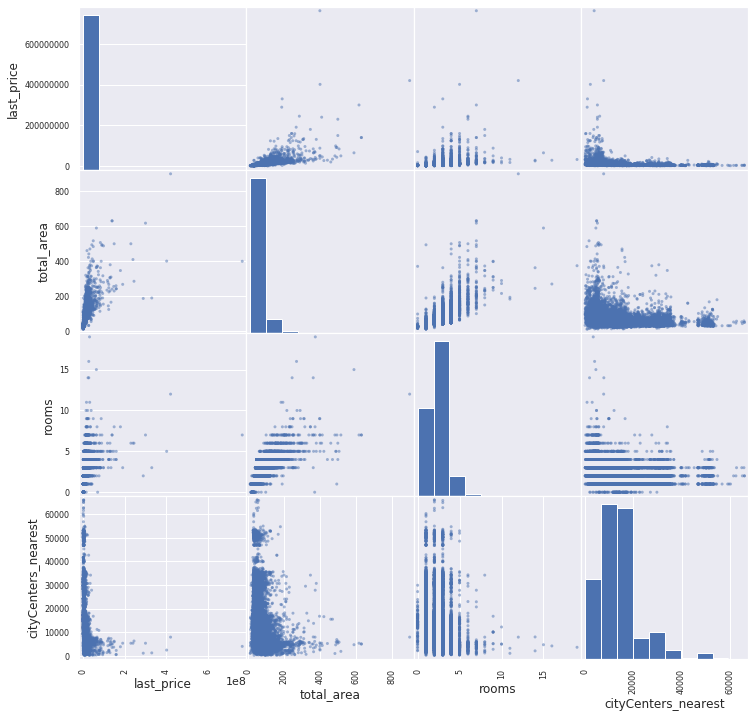

In [92]:
pd.plotting.scatter_matrix(cost_data1,figsize=(12,12))
plt.show()

Как видно из таблицы и матрицы корреляции цена квартиры сильнее всего зависит от её площади, что логично. Чем выше площадь, тем выше цена. Аналогичная картина и с количеством комнат, но не такая сильная, как с площадью.
Зависимость от расстояния до центра города также есть, чем дальше от центра, тем цена ниже, что тоже логично.

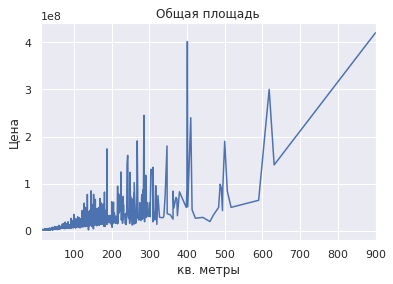

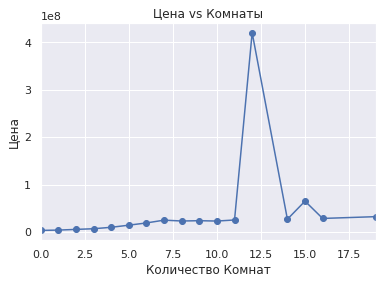

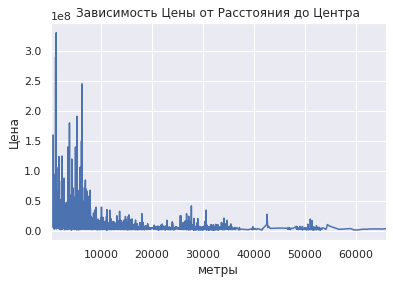

In [93]:
df.groupby('total_area').last_price.median().plot()
plt.title("Общая площадь")
plt.xlabel("кв. метры")
plt.ylabel("Цена")
plt.show()
df.groupby('rooms').last_price.median().plot(style = 'o-')
plt.title("Цена vs Комнаты")
plt.xlabel("Количество Комнат")
plt.ylabel("Цена")
plt.show()
df.groupby('cityCenters_nearest').last_price.median().plot()
plt.title("Зависимость Цены от Расстояния до Центра")
plt.xlabel("метры")
plt.ylabel("Цена")
plt.show()

,last_price,day,month,year
last_price,1.000000,0.004749,0.000987,-0.041676
day,0.004749,1.000000,0.007070,-0.002851
month,0.000987,0.007070,1.000000,-0.274542
year,-0.041676,-0.002851,-0.274542,1.000000


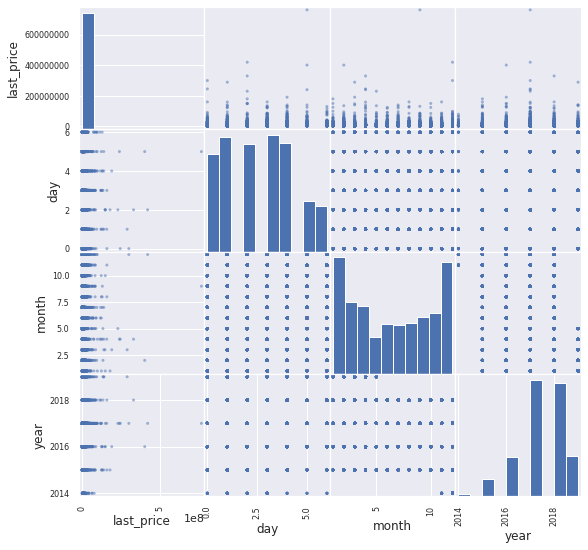

In [94]:
display(cost_data2.corr())
pd.plotting.scatter_matrix(cost_data2,figsize=(9,9))
plt.show()

**Вывод:**  
Как видно из таблицы и матрицы корреляции явной зависимости от дня недели, месяца или года не наблюдается.

,last_price,floor_cat_didg
last_price,1.000000,-0.068495
floor_cat_didg,-0.068495,1.000000


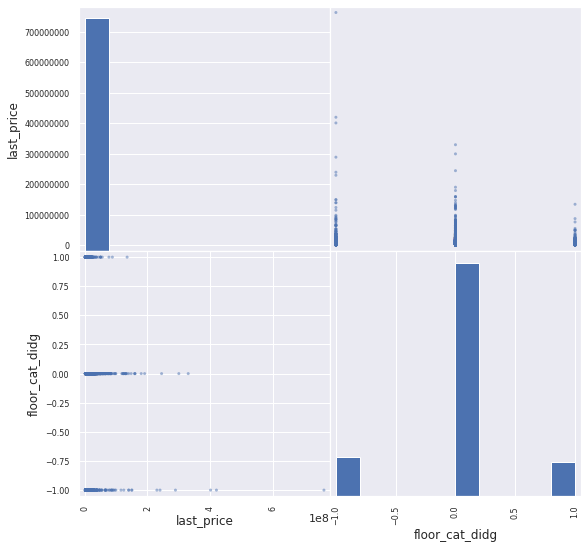

In [95]:
display(cost_data3.corr())
pd.plotting.scatter_matrix(cost_data3,figsize=(9,9))
plt.show()

### Вывод: <a id=cell4.6.1></a>

Как видно из приведенных выше таблиц корреляций и матриц диаграм рассеивания, зависимости такие как мы и интуитивно их чувствуем. Цена зависит от общей площади квартиры, чем больше площадь, тем больше цена; Чем больше комнат, тем больше площадь, следовательно выше цена. Чем ближе к центру, тем выше цена, а чем дальше от центра, то тем ниже.  


Зависимость цены от дня недели, месяца или года - не наблюдается, либо она не явная. 


Зависимость цены от того какой этаж: первый, последний, или другой также не наблюдается. Но объявлений с промежуточными этажами явно больше.

## Анализ средней цены $м^2$ квартиры в 10 населенных пунктах с наибольшим количеством объявлений <a id=cell4.7></a>

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

В этом пункте сделаю выборку по всем данным, так как есть необходимые данные для этого, потом сравню с обработанными данными.

In [96]:
display(data.locality_name.value_counts().head(10))
#print(data.columns)

top10_names = list(data.locality_name.value_counts().head(10).index)

print(top10_names)

df10 = data.query('locality_name in @top10_names')

median_price = (df10.groupby('locality_name').last_price
                            .median()
                            .sort_values(ascending = False)
                            .apply(lambda x: f'{x:1.1e}')
                            .reset_index()
                            .rename(columns = {'last_price': "Средняя Цена Квартиры (медиана)", 'locality_name': 'Населенный Пункт'}))

mean_m2 = (df10.groupby('locality_name').cost_m2
                            .median()
                            .sort_values(ascending = False)
                            .apply(lambda x: f'{x:.0f}')
                            .reset_index()
                            .rename(columns = {'cost_m2': "Средняя Цена Кв. Метра", 'locality_name': 'Населенный Пункт'}))
# display(median_price)
# display(mean_m2)
table = median_price.merge(mean_m2, on = 'Населенный Пункт')

display(table)

pivot_table = df10.pivot_table(index = 'locality_name', values = ['last_price','cost_m2'], aggfunc = {'cost_m2': 'mean', 'last_price': 'median'})

#display(pivot_table.sort_values(by = 'cost_m2', ascending = False))

Санкт-Петербург    15625
Мурино               584
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              306
Выборг               237
Name: locality_name, dtype: int64

['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг']


,Населенный Пункт,Средняя Цена Квартиры (медиана),Средняя Цена Кв. Метра
0,Санкт-Петербург,5.5e+06,104770
1,Пушкин,5.2e+06,100000
2,Парголово,4.1e+06,91643
3,Шушары,4.0e+06,76829
4,Кудрово,3.9e+06,95555
5,Колпино,3.6e+06,74724
6,Всеволожск,3.4e+06,65789
7,Мурино,3.4e+06,86250
8,Гатчина,3.1e+06,67861
9,Выборг,2.9e+06,58158


### Вывод: <a id=cell4.7.1></a>

Самое дорогое жилье, как и следовало ожидать, находится в Питере. Дальше за ним идет Пушкин, ну а 3 место занимает посёлок Парголово. Самое дешёвое жильё оказалось в Выборге.

Для вычисления среднего брал медиану, так как она более устойчива к выбросам.

## Определение центральной зоны <a id=cell4.8></a>

Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

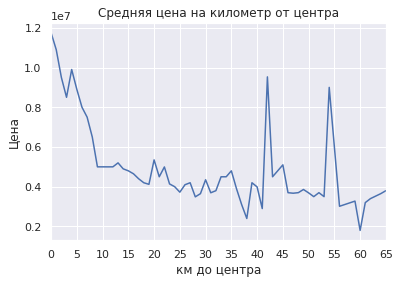

In [97]:
df['center_km'] = (df.cityCenters_nearest // 1000).astype('int')
# df.center_km.head(10)
df.groupby('center_km').last_price.median().plot()
plt.title('Средняя цена на километр от центра')
plt.xlabel('км до центра')
plt.ylabel("Цена")
plt.xticks([x*5 for x in range(14)])
plt.show()

Нарисовали график для всех заявок, теперь нарисуем этот же график, но только уже для Санкт-Петербурга.

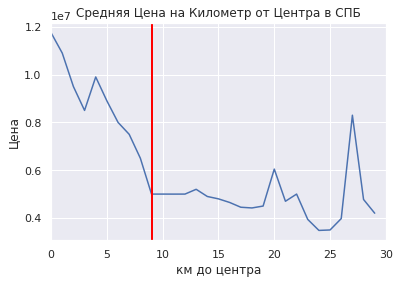

In [98]:
df.query('locality_name == "Санкт-Петербург"').groupby('center_km').last_price.median().plot()
plt.title('Средняя Цена на Километр от Центра в СПБ')
plt.xlabel('км до центра')
plt.ylabel("Цена")
plt.xticks([x*5 for x in range(7)])
plt.axvline(x=9, color = 'red', linewidth = 2)
plt.show()

### Вывод: <a id=cell4.8.1></a>
Плато у меня получилось на 9 километрах, всё что меньше 9 км, можно считать центром и цена там резко повышается.  
Снова за среднее взял медиану, так как она более устойчива к выбросам.

# Изучение центральной зоны СПБ <a id=cell5></a>

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [99]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb_not_center = spb.query('center_km > 9')
spb_center = df.query('locality_name == "Санкт-Петербург" and center_km <= 9')

In [100]:
print(f'Доля объявлений в центральной зоне СПБ: {len(spb_center) / len(spb):0.1%}')

Доля объявлений в центральной зоне СПБ: 32.4%


In [101]:
display(spb_center[['last_price','total_area','rooms','ceiling_height']].corr())

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.642633,0.352775,0.167649
total_area,0.642633,1.000000,0.757115,0.313314
rooms,0.352775,0.757115,1.000000,0.283838
ceiling_height,0.167649,0.313314,0.283838,1.000000


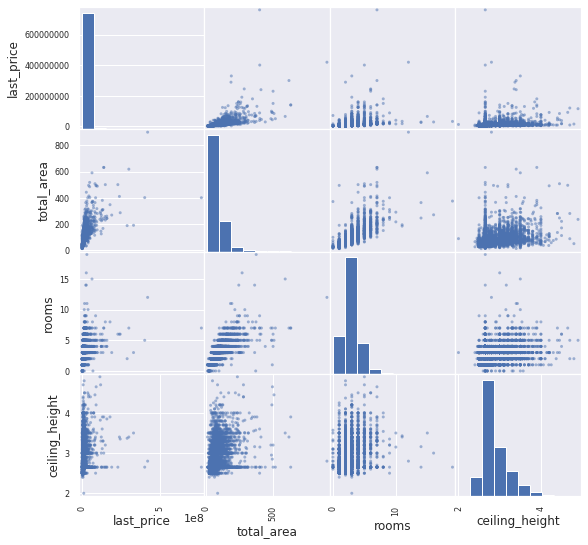

In [102]:
pd.plotting.scatter_matrix(spb_center[['last_price','total_area','rooms','ceiling_height']],figsize=(9,9))
plt.show()

Как видно из матрицы рассеивания и таблицы корреляции, картина очень схожа с общей по разным городам, даже числа почти одинаковые. 

Рассмотрим более подробно распределения для полной площади, для цен, комнат и высоты потолков.

In [103]:
sns.set_context("notebook", font_scale=1)
# for column in ['total_area','last_price','rooms','ceiling_height']:
#     display(spb_center[column].describe())
#     spb_center[column].plot(kind ='hist', bins = 20, title = column, range = (0,np.quantile(spb_center[column], 0.95)))
#     plt.show()

Здесь пытался сделать графики через цикл, но они получились ненаглядными и сложно управляемыми, поэтому дальше для каждой категории отдельно воспользовался ранее написанной функцией `print_hist(data, column, x_label, y_label, title, limits = (0,1000000), bins = 20)`

## Распределение полной площади в центральной зоне СПБ <a id=cell5.1></a>

count    5047.000000
mean       84.184735
std        55.633696
min        12.000000
25%        49.150000
50%        71.000000
75%        99.500000
max       900.000000
Name: total_area, dtype: float64

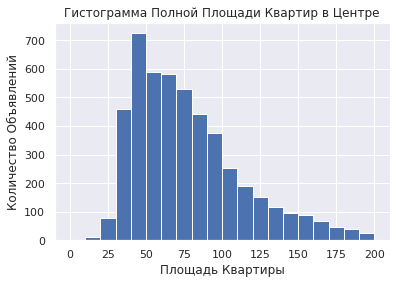

In [104]:
print_hist(spb_center, 'total_area', 'Площадь Квартиры', 'Количество Объявлений', "Гистограмма Полной Площади Квартир в Центре", (0,200))

count    10518.000000
mean        55.204154
std         24.863263
min         13.000000
25%         39.300000
50%         49.500000
75%         64.200000
max        470.300000
Name: total_area, dtype: float64

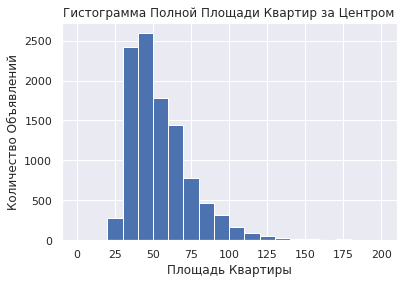

In [105]:
print_hist(spb_not_center, 'total_area', 'Площадь Квартиры', 'Количество Объявлений', "Гистограмма Полной Площади Квартир за Центром", (0,200))

### Вывод: <a id=cell5.1.1></a>
Как видно из распределения, по сравнению с общей картиной города за центром, в центральной зоне добавился более выделенный сегмент квартир с площадью от 50 до 100 $м^2$, вто время как за центром в основном квартиры от 30-70 $м^2$

## Распределение цены квартир в центральной зоне СПБ <a id=cell5.2></a>

count    5.047000e+03
mean     1.269999e+07
std      2.142152e+07
min      1.219000e+04
25%      5.700000e+06
50%      8.200000e+06
75%      1.272200e+07
max      7.630000e+08
Name: last_price, dtype: float64

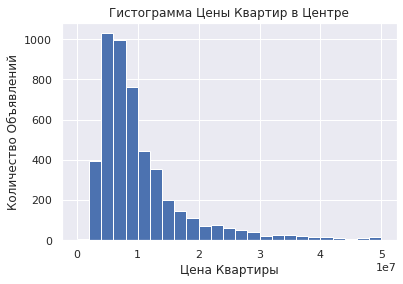

In [106]:
print_hist(spb_center, 'last_price', 'Цена Квартиры', 'Количество Объявлений', "Гистограмма Цены Квартир в Центре", limits = (0, 50*10**6), bins = 25)

count    1.051800e+04
mean     5.762390e+06
std      3.247814e+06
min      1.190000e+06
25%      3.950000e+06
50%      4.900000e+06
75%      6.450000e+06
max      7.700000e+07
Name: last_price, dtype: float64

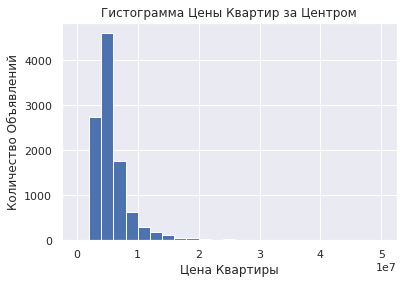

In [107]:
print_hist(spb_not_center, 'last_price', 'Цена Квартиры', 'Количество Объявлений', "Гистограмма Цены Квартир за Центром", limits = (0, 50*10**6), bins = 25)

### Вывод: <a id=cell5.2.1></a>

Как видно из распределения и сводной информации, более менее дешёвые квартиры в центре стоят около 5.7 млн, средняя цена квартир уже 8.2 млн, дорогие квартиры стоят 12.7 млн, а дальше идет длинный хвост из очень дорогих квартир. Самая дорогая квартира стоит 763 млн... 

По сравнению с остальной частью города явно виден рост цен для центральной зоны, в то время как за центром квартиры стоят в основном от 2 до 8 млн




## Распределение количество комнат в центральной зоне СПБ

count    5047.000000
mean        2.626709
std         1.387242
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

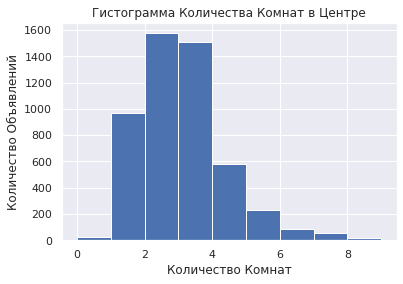

In [108]:
print_hist(spb_center, 'rooms', 'Количество Комнат', 'Количество Объявлений', "Гистограмма Количества Комнат в Центре", limits = (0, 9), bins = 9)

count    10518.000000
mean         1.953223
std          0.935445
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

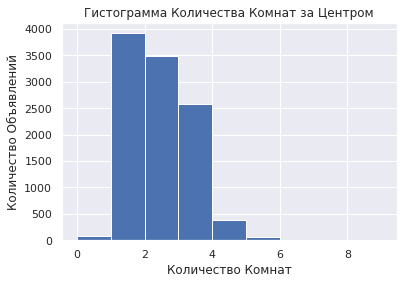

In [109]:
print_hist(spb_not_center, 'rooms', 'Количество Комнат', 'Количество Объявлений', "Гистограмма Количества Комнат за Центром", limits = (0, 9), bins = 9)

### Вывод:

Как видно из распределений выше, в центральной зоне почти в 2 раза меньше однокомнатных квартир, чем двухкомнатных или трёхкомнатных. Также заметен довольно значительный сегмент с четырехкомнатными квартирами. Также есть заметный хвост с 5-8 комнатами.  

За центральной зоной наибольшую позицию занимают как раз однокомнатные квартиры, нежели двухкомнатные и четырехкомнатные. Относительная доля 4-5 квартир маленькая. Но по числам такие квартиры также присутствуют вне центральной зоны, но из-за масштаба не видно.



## Распределение высоты потолков в центральной зоне СПБ

count    5047.000000
mean        2.875265
std         0.332642
min         2.000000
25%         2.650000
50%         2.700000
75%         3.000000
max         4.900000
Name: ceiling_height, dtype: float64

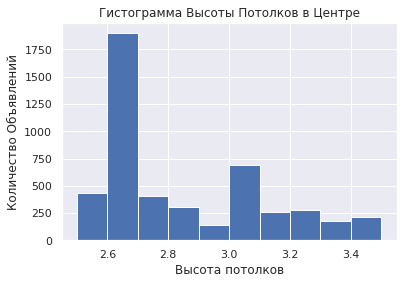

In [110]:
print_hist(spb_center, 'ceiling_height', 'Высота потолков', 'Количество Объявлений', "Гистограмма Высоты Потолков в Центре", limits = (2.5, 3.5), bins = 10)

count    10518.000000
mean         2.648432
std          0.126226
min          2.000000
25%          2.570000
50%          2.650000
75%          2.650000
max          4.500000
Name: ceiling_height, dtype: float64

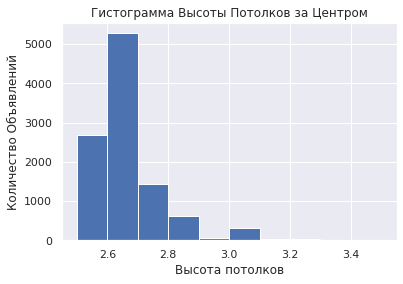

In [111]:
print_hist(spb_not_center, 'ceiling_height', 'Высота потолков', 'Количество Объявлений', "Гистограмма Высоты Потолков за Центром", limits = (2.5, 3.5), bins = 10)

### Вывод:

Здесь выбивается в графиках значение 2.65м, так как я заполнял недостающие значения как раз этим значением. 

В центральной зоне выделяются два пика, один как раз в районе 2.65м и другой в 3.0м отметке.


## Зависимости цены в центре СПБ

Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [112]:
print("Таблица Корреляции в Центре")
spb_center[['last_price', 'rooms', 'floor_cat_didg', 'center_km', 'year', 'month','day']].corr()

Таблица Корреляции в Центре


,last_price,rooms,floor_cat_didg,center_km,year,month,day
last_price,1.000000,0.352775,-0.089239,-0.152049,-0.052190,0.004874,0.017283
rooms,0.352775,1.000000,-0.104033,-0.278133,-0.072292,-0.000694,-0.012144
floor_cat_didg,-0.089239,-0.104033,1.000000,0.024463,0.004730,0.003609,-0.010945
center_km,-0.152049,-0.278133,0.024463,1.000000,0.087615,-0.032620,0.008632
year,-0.052190,-0.072292,0.004730,0.087615,1.000000,-0.257099,-0.002195
month,0.004874,-0.000694,0.003609,-0.032620,-0.257099,1.000000,0.022331
day,0.017283,-0.012144,-0.010945,0.008632,-0.002195,0.022331,1.000000


In [113]:
print("Таблица Корреляции за Центром")
spb_not_center[['last_price', 'rooms', 'floor_cat_didg', 'center_km', 'year','month','day']].corr()

Таблица Корреляции за Центром


,last_price,rooms,floor_cat_didg,center_km,year,month,day
last_price,1.000000,0.511737,-0.038991,-0.103709,0.024217,0.000133,0.006317
rooms,0.511737,1.000000,0.042854,-0.040238,-0.019973,-0.005345,-0.000612
floor_cat_didg,-0.038991,0.042854,1.000000,-0.010942,-0.008826,-0.007079,-0.010392
center_km,-0.103709,-0.040238,-0.010942,1.000000,0.017801,0.001081,-0.027851
year,0.024217,-0.019973,-0.008826,0.017801,1.000000,-0.291559,-0.001699
month,0.000133,-0.005345,-0.007079,0.001081,-0.291559,1.000000,-0.005406
day,0.006317,-0.000612,-0.010392,-0.027851,-0.001699,-0.005406,1.000000


### Вывод:

Как и по общей картине объявлений есть тенденция зависимости от количества комнат в квартире, но это и понятно, так как чем больше комнат, тем больше и площадь. Единственное за пределами центральной зоны эта зависимость выражена сильнее.

От этажа прямой зависимости нет, как и от даты объявления. 

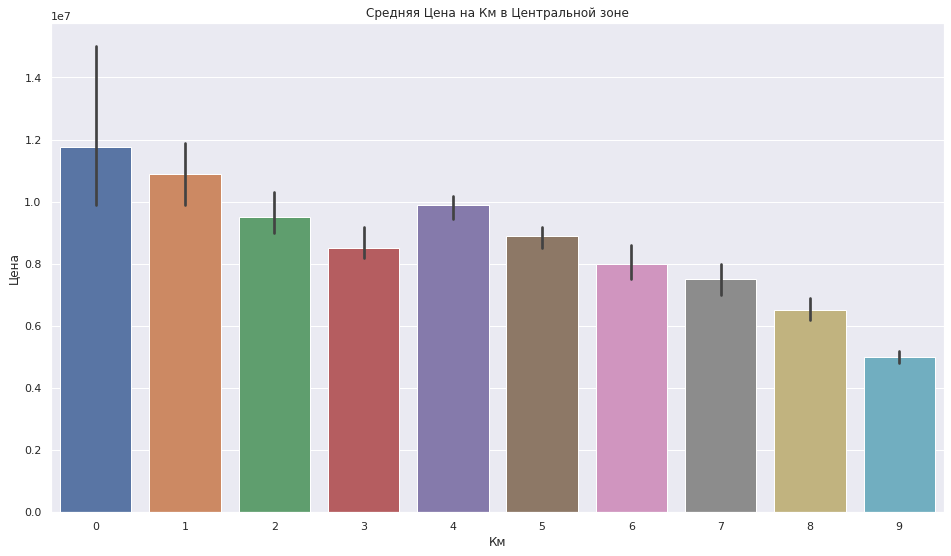

In [114]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center, x = 'center_km', y = 'last_price', estimator = np.median)
sns.set_context(font_scale=2)
plt.title('Средняя Цена на Км в Центральной зоне')
plt.ylabel('Цена')
plt.xlabel('Км')
plt.show()

In [115]:
spb_center.groupby('center_km').agg({'last_price': ['count','median']})#.reset_index().rename(columns = {'center_km': 'км','last_price': 'Средняя Цена'})

last_price            
               count      median
center_km                       
0                 86  11750000.0
1                239  10900000.0
2                307   9500000.0
3                521   8500000.0
4                902   9900000.0
5                767   8900000.0
6                467   8000000.0
7                407   7500000.0
8                664   6500000.0
9                687   5000000.0

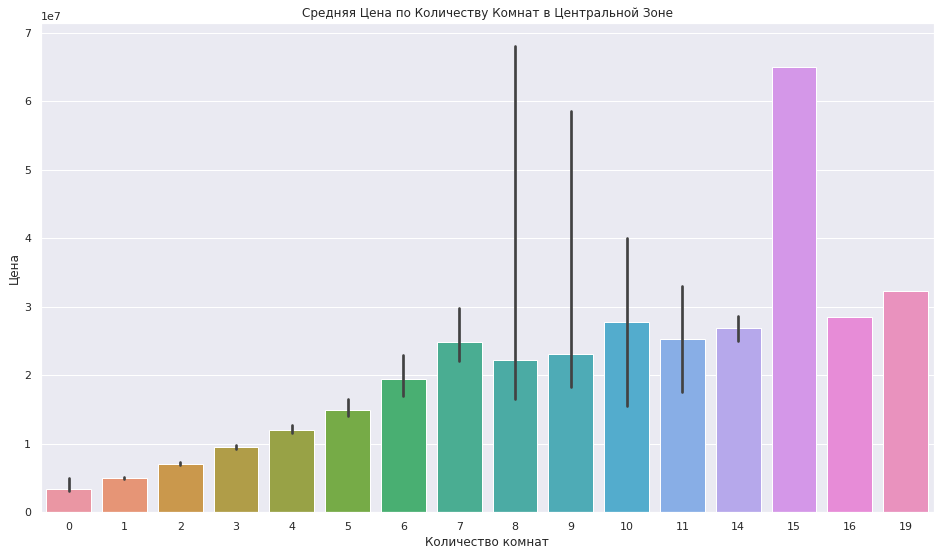

In [116]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center.query('rooms != 12'), x = 'rooms', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по Количеству Комнат в Центральной Зоне')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.show()

In [117]:
spb_center.query('rooms > 4').rooms.value_counts()

5     227
6      87
7      54
8      11
9       6
14      2
11      2
10      2
19      1
16      1
15      1
12      1
Name: rooms, dtype: int64

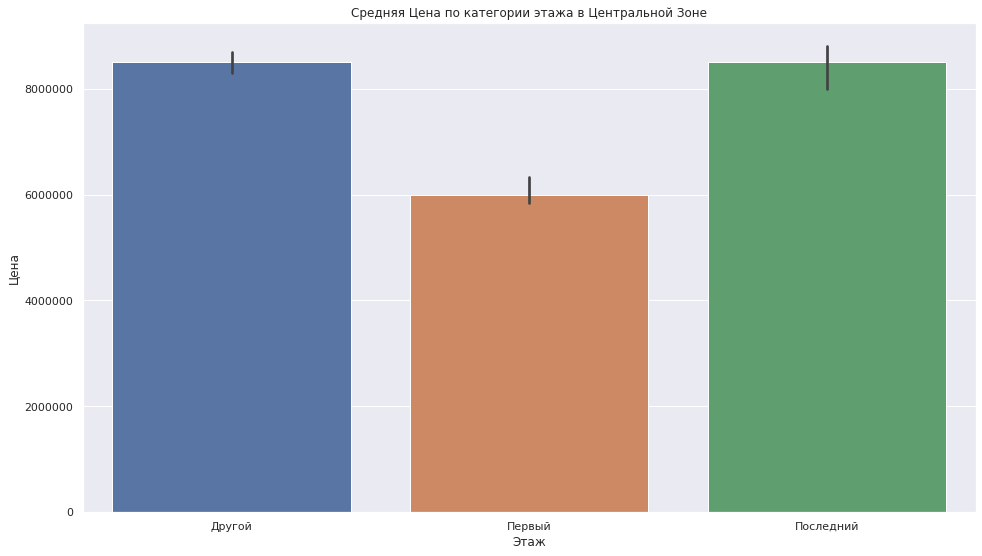

In [118]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center, x = 'floor_cat', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по категории этажа в Центральной Зоне')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.show()

Интересный факт, что средняя цена на первом этаже в центре на 2 млн ниже, чем на другие этажи

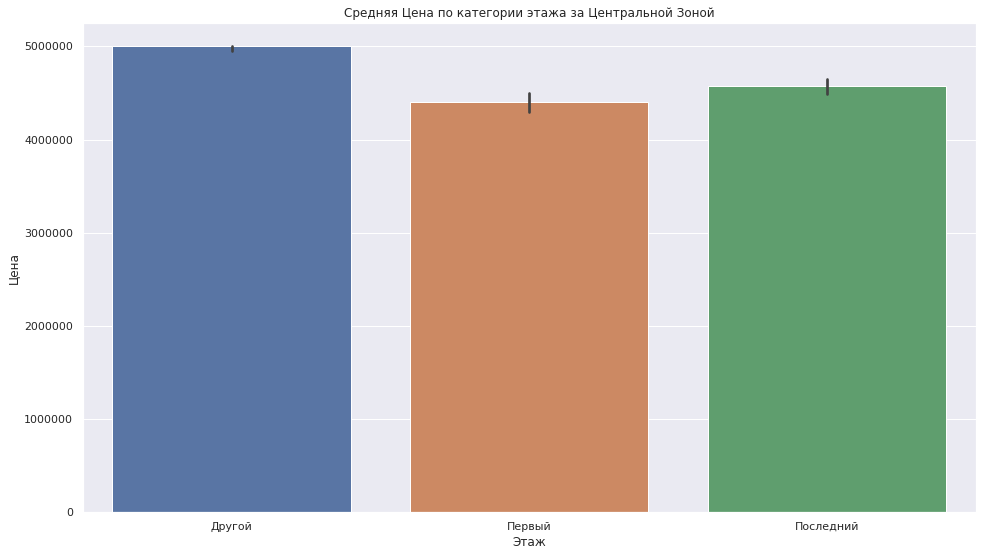

In [119]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_not_center, x = 'floor_cat', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по категории этажа за Центральной Зоной')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.show()

А вот не в центральной зоне цены на первый и последний этажи на пол миллиона пониже в среднем, чем на любой другой этаж.

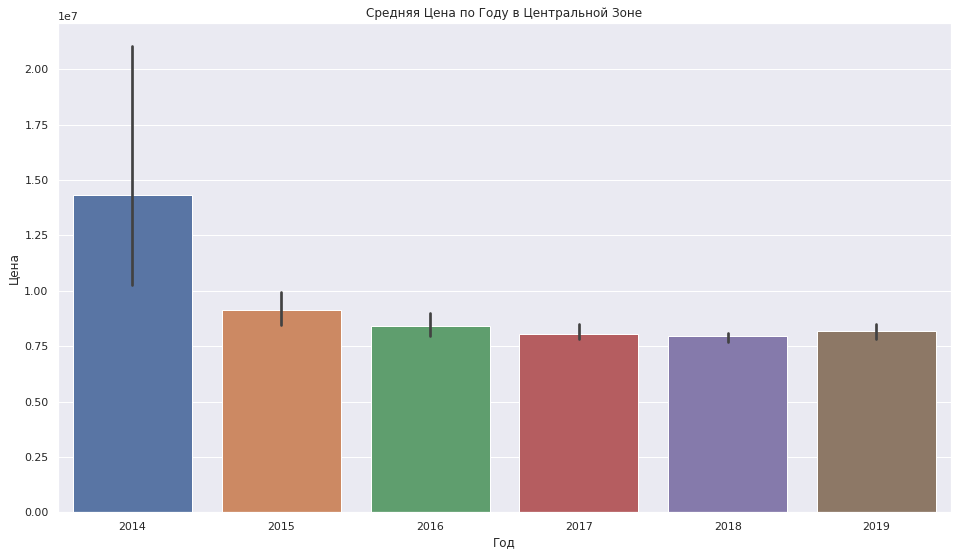

In [120]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center, x = 'year', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по Году в Центральной Зоне')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()

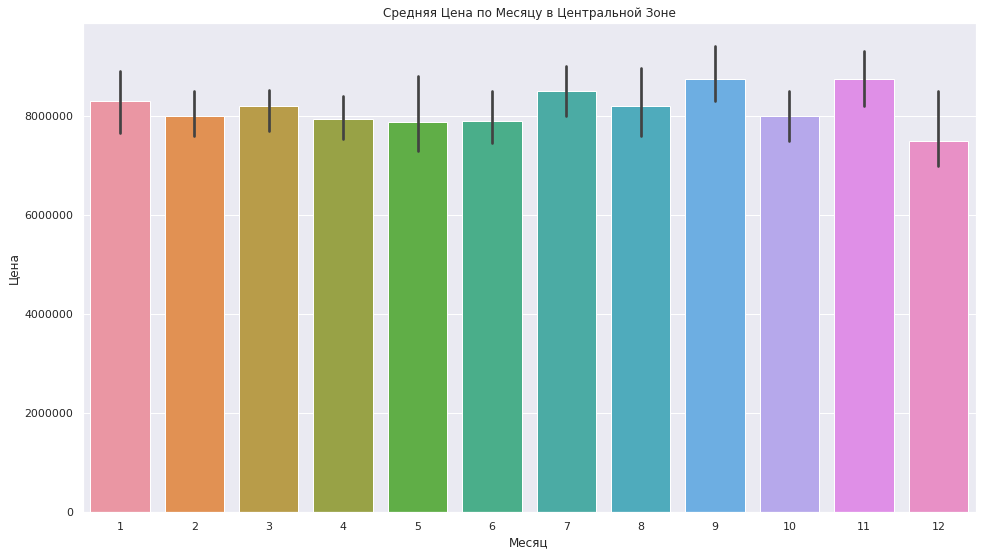

In [121]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center, x = 'month', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по Месяцу в Центральной Зоне')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

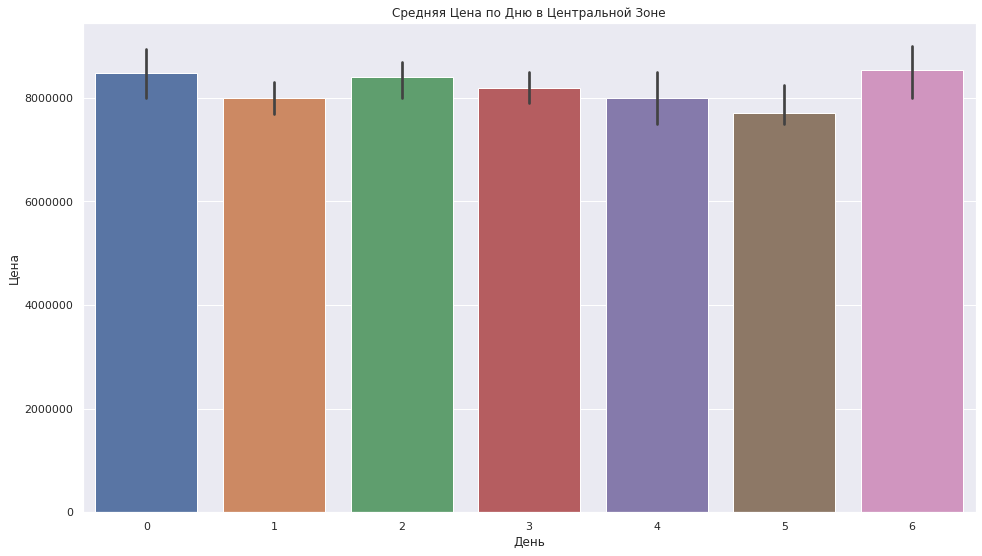

In [122]:
plt.figure(figsize = (16,9))
sns.barplot(data = spb_center, x = 'day', y = 'last_price', estimator = np.median)
plt.title('Средняя Цена по Дню в Центральной Зоне')
plt.ylabel('Цена')
plt.xlabel('День')
plt.show()

## Общий вывод

Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша **задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

При просмотре изначальных данных выявилось несколько **проблем**:

* Обнаружилось множество пропусков в столбцах с высотой потолков и наличием балкона. Скорее всего связано, что заявители просто не заполнили эти данные. В дальнейшем они были заменены медианой для высоты потолков и 0 для отсутствующих балконов.


* Ещё один пласт пропусков возник в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_around3000`. Здесь как раз около 5500 пропусков одновременно, скорее всего следствие автоматической сборки данных.


* Необходимо полностью пересмотреть то, как собирались данные для столбца `is_apartment`. Там скорее всего ошибка в логике при сборе данных, так как были только значение `false` и `nan` и в добавок тип всего этого был object.


* `days_exposition`: Не на все объявления есть информация сколько дней они выставлялись, не хватает 3200 записей.


* `locality_name`: Всего 364 уникальных записи, но есть разношёрстность в названиях мест. К примеру пос**е**лок и пос**ё**лок, и типы поселков по разному назывались. После того как остались только имена собственные названий, то было удалено 60 дубликатов.


### **Инсайты в данных**

Временной диапазон нашей выборки объявлений с ноября 2014 по май 2019. 


|     | Год     | Количество объявлений |
| --- | ------- | --------------------- |
|0	  | 2014	| 114                   |  
|1	  | 2015	| 953                   |  
|2	  | 2016	| 2151                  |   
|3	  | 2017	| 6395                  |   
|4	  | 2018	| 6232                  |   
|5	  | 2019	| 2192                  |   


Что интересно, так это резкое повышение объявлений в приложении, начиная с 2017 года, по сравнению с предыдущими годами.  
Не берем в расчет 2014 год, так как там не весь год, а 2019 пусть и всего 5 месяцем имеет ту же тенденцию к росту объявлений, что и в 2017 и 2018 годах.  
В 2017 году начинали продавать квартиры больше всего к концу зимы в феврале, дальше был спад и с июля снова пошёл рост.
В 2018 году Пик объявлений на продажу пришёлся в ноябре.

**Цена за $м^2$:**  
Пик цен приходится где-то на 100000р за $м^2$  
Основная масса цен находится в диапазоне от 50-150 тыс. рублей за $м^2$

**Распределение по площади:**  
В целом видно, что после 200 $м^2$ уже нет объявлений. Площадь плотно распределена от 30 - 80 $м^2$, с медианными значением 54 $м^2$. Есть много (223) единичных объявлений с полощадями больше 200 $м^2$.

**Распределение по ценам:**  
Основной массив объявлений лежит в диапазоне от 2.5 - 8 млн рублей. Есть ценовой сегмент > 10 млн, который составляет около 10% датасета.

**Анализ времени продажи квартир:**  
Здесь оказалось не всё так однозначно, диапазон продажи объявлений был от 0 до 1580 (4.3 года). Основной пик продаж приходится на первые 100 дней, то есть первые 3 месяца, дальше идёт всё на спад. При более подробном рассмотрении первых 100 дней обнаружились выделяющиеся пики на 45 и 60 днях. Судя по всему это следствие автоматического закрытия объявлений в эти дни.  
Также были выделены сегменты очень быстрых продаж - до 5 дней, и очень медленных - больше 800 дней (2.2 года), когда квартиры практически и не продаются.

**Анализ средней цены  $м^2$  квартиры в 10 населенных пунктах с наибольшим количеством объявлений:**  
Самое дорогое жилье, как и следовало ожидать, находится в Питере (105к). Дальше за ним идет Пушкин (100к), ну а 3 место занимает посёлок Парголово (91к). Самое дешёвое жильё оказалось в Выборге (58к).

### **Анализ по СПБ**

Для начала определили центральную зону для Питера, где цены значительно повышаются. Она оказалась до 9 км. Дальше проводили анализ по ценам на квартиры для центра и для зоны за центром.  

**Площадь**  
По сравнению с общей картиной города за центром, в центральной зоне присутствует более выделенный сегмент квартир с площадью от 50 до 100  $м^2$ , в то время как за центром в основном квартиры от 30-70  $м^2$

**Цена**
Более менее дешёвые квартиры в центре стоят около 5.7 млн, средняя цена квартир уже 8.2 млн, дорогие квартиры стоят 12.7 млн, а дальше идет длинный хвост из очень дорогих квартир.  
По сравнению с остальной частью города явно виден рост цен для центральной зоны, в то время как за центром квартиры стоят в основном от 2 до 8 млн.

Для меня было интересно обнаружить, что цена квартиры на 1 этаже в центральной зоне Питера в среднем стоит на 2 млн дешевле нежели на других этажах. А вот за центром первый и последний этажи в среднем стоят на пол миллиона дешевле, что тоже неплохо при выборе квартиры.

Цена на квартиру в основном зависит от её площади и от расстояния до центра. Зависимость от количества комнат - косвенная, так как чем больше комнат - тем больше площадь, отсюда и зависимость.  
Зависимость цены от высоты потолков или дня, месяца, года размещения объявления не выявлена.

Анализ зависимости цены от расстояния до аэропорта, количества рядом парков или прудов, в данной работе проведен не был. 